# EXPLORING COFFEE SHOP DATASET

## IMPORT PACKAGES

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

## DEFINE FUNCTIONS AND SETTINGS

**Function-function yang akan sering dipakai di keseluruhan notebook** didefinisikan terlebih dahulu di atas, agar lebih mudah dikenali dan dipahami ketika digunakan dalam notebook ini.

In [2]:
def display_df(df, n = 5):
    '''
        Display the first n rows (default = 5) of a DataFrame and its shape
        Goal: To print short previews of a dataset and know its dimensions at the same time
    '''
    if n == 'all':
        display(df)
    elif type(n) == int:
        display(df.head(n))
    display(df.shape)

def describe_df(df):
    '''
        Display the result of df.describe(), both the default result 
        and selecting only object dtypes.
    '''
    display(df.describe())
    display(df.select_dtypes('object').describe())

def convert_type(df, type_dict):
    '''
        Taking a dictionary of type-column(s) pairs, convert the types of many 
        columns in a DataFrame at once.
    '''
    # Convert datetime first 
    # There is a way not to do this with datetime64[ns], but this is probably more robust
    if 'datetime' in type_dict:
        datetime_columns = type_dict.pop('datetime')
        df[datetime_columns] = df[datetime_columns].apply(pd.to_datetime)
    
    if 'str' in type_dict:
        str_columns = type_dict.pop('str')
        missing_filter = df[str_columns].isnull()
        
        df[str_columns] = df[str_columns].astype('str')
        df[missing_filter] = np.nan
    
    for data_type, columns in type_dict.items():
        df[columns] = df[columns].astype(data_type)
        
    return df

**Beberapa pengaturan dari _packages_ yang berguna dalam keseluruhan notebook akan diatur terlebih dahulu di sini.**

In [3]:
pd.set_option('mode.chained_assignment', None)
sns.set_style('darkgrid')

## READ DATASET

### CUSTOMERS

In [4]:
customers = pd.read_csv('customer.csv')
display_df(customers)

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951


(2246, 9)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   object
 8   birth_year           2246 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 158.0+ KB


In [6]:
describe_df(customers)

,customer_id,home_store,birth_year
count,2246.000000,2246.000000,2246.000000
mean,4285.902048,4.956812,1978.385574
std,3088.088265,1.852562,14.925503
min,1.000000,3.000000,1950.000000
25%,562.250000,3.000000,1965.000000
50%,5323.500000,5.000000,1981.000000
75%,5884.750000,5.000000,1991.000000
max,8501.000000,8.000000,2001.000000


,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender
count,2246,2246,2246,2246,2246,2246
unique,1640,2246,794,2246,1883,3
top,Marny,Venus@adipiscing.edu,2017-05-08,908-424-2890,2001-04-09,F
freq,6,1,8,1,6,977


### GENERATIONS

In [7]:
generations = pd.read_csv('generations.csv')
display_df(generations)

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers


(70, 2)

In [8]:
generations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  70 non-null     int64 
 1   generation  70 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [9]:
describe_df(generations)

,birth_year
count,70.000000
mean,1980.500000
std,20.351085
min,1946.000000
25%,1963.250000
50%,1980.500000
75%,1997.750000
max,2015.000000


,generation
count,70
unique,5
top,Gen Z
freq,21


### PASTRY INVENTORY

In [10]:
pastry_invts = pd.read_csv('pastry inventory.csv')
display_df(pastry_invts)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%


(307, 7)

In [11]:
pastry_invts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    int64 
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    int64 
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.9+ KB


In [12]:
describe_df(pastry_invts)

,sales_outlet_id,product_id,start_of_day,quantity_sold,waste
count,307.000000,307.000000,307.000000,307.000000,307.000000
mean,5.394137,70.983713,24.058632,9.296417,14.657980
std,2.049477,1.417582,12.063414,5.440115,11.202108
min,3.000000,69.000000,18.000000,0.000000,0.000000
25%,3.000000,70.000000,18.000000,6.000000,8.000000
50%,5.000000,71.000000,18.000000,8.000000,11.000000
75%,8.000000,72.000000,18.000000,11.000000,15.000000
max,8.000000,73.000000,48.000000,32.000000,47.000000


,transaction_date,% waste
count,307,307
unique,27,35
top,4/14/2019,50%
freq,15,34


### PRODUCTS

In [13]:
products = pd.read_csv('product.csv')
display_df(products)

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N


(88, 12)

In [14]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               88 non-null     int64  
 1   product_group            88 non-null     object 
 2   product_category         88 non-null     object 
 3   product_type             88 non-null     object 
 4   product                  88 non-null     object 
 5   product_description      88 non-null     object 
 6   unit_of_measure          88 non-null     object 
 7   current_wholesale_price  88 non-null     float64
 8   current_retail_price     88 non-null     object 
 9   tax_exempt_yn            88 non-null     object 
 10  promo_yn                 88 non-null     object 
 11  new_product_yn           88 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 8.4+ KB


In [15]:
describe_df(products)

,product_id,current_wholesale_price
count,88.000000,88.000000
mean,44.534091,3.888409
std,25.605293,5.649682
min,1.000000,0.040000
25%,22.750000,0.630000
50%,44.500000,1.195000
75%,66.250000,5.360000
max,89.000000,36.000000


,product_group,product_category,product_type,product,product_description,unit_of_measure,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
count,88,88,88,88,88,88,88,88,88,88
unique,5,9,31,88,57,13,40,2,2,2
top,Beverages,Coffee,Barista Espresso,Brazilian - Organic,You will think you are in Venice when you sip ...,16 oz,$3.00,Y,N,N
freq,47,25,7,1,5,16,14,72,84,86


### RECEIPTS

In [16]:
receipts = pd.read_csv('sales reciepts.csv')
display_df(receipts)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


(49894, 14)

In [17]:
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   transaction_time  49894 non-null  object 
 3   sales_outlet_id   49894 non-null  int64  
 4   staff_id          49894 non-null  int64  
 5   customer_id       49894 non-null  int64  
 6   instore_yn        49894 non-null  object 
 7   order             49894 non-null  int64  
 8   line_item_id      49894 non-null  int64  
 9   product_id        49894 non-null  int64  
 10  quantity          49894 non-null  int64  
 11  line_item_amount  49894 non-null  float64
 12  unit_price        49894 non-null  float64
 13  promo_item_yn     49894 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 5.3+ MB


In [18]:
describe_df(receipts)

,transaction_id,sales_outlet_id,staff_id,customer_id,order,line_item_id,product_id,quantity,line_item_amount,unit_price
count,49894.000000,49894.000000,49894.000000,49894.000000,49894.000000,49894.000000,49894.000000,49894.000000,49894.000000,49894.000000
mean,869.056059,5.351846,25.359582,2282.324468,1.173428,1.631860,47.878983,1.438209,4.682646,3.384645
std,857.863149,2.074796,12.466490,3240.551757,1.025445,1.412881,17.928355,0.543039,4.436668,2.682545
min,1.000000,3.000000,6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.800000
25%,223.000000,3.000000,15.000000,0.000000,1.000000,1.000000,33.000000,1.000000,3.000000,2.500000
50%,481.000000,5.000000,26.000000,0.000000,1.000000,1.000000,47.000000,1.000000,3.750000,3.000000
75%,1401.000000,8.000000,41.000000,5412.000000,1.000000,1.000000,60.000000,2.000000,6.000000,3.750000
max,4203.000000,8.000000,45.000000,8501.000000,9.000000,12.000000,87.000000,8.000000,360.000000,45.000000


,transaction_date,transaction_time,instore_yn,promo_item_yn
count,49894,49894,49894,49894
unique,29,26074,3,2
top,2019-04-19,11:40:03,Y,N
freq,1907,11,24992,49404


## PROBLEM STATEMENT

**Asumsi**: Semua perhitungan tanggal menggunakan asumsi bahwa waktu analisis adalah April 2019, yaitu bulan dari data `receipts`.

**Reasoning**: Misalnya, perhitungan usia customers bisa jadi tidak relevan jika menggunakan tahun 2021, sementara _behavior_ yang kita analisis berasal dari tahun 2019. _Oleh karena itu, waktu analisis lebih sesuai jika diasumsikan pada 2019 dibandingkan tahun sekarang, yaitu 2021._

In [19]:
# Diasumsikan mulai dari awal bulan
current_datetime = pd.to_datetime('2019-04-01')

**Daftar Pertanyaan**

Dibuat per _goal_ dan _objective_ analisis.

1. **Melakukan profiling customer agar bisa mendapatkan customer yang lebih tertarget mendukung dalam pendistribusian produk di setiap store**
- Siapa customers kita secara gender dan generasi?
- Bagaimana distribusi customers kita per (home) store?
- Bagaimana taste customer kita per segmentasi?
- Siapakah customer kita yang merupakan customer terbesar?

2. **Memberikan product recommendation agar bisa meningkatkan revenue**
- Jenis produk manakah yang merupakan kontributor utama pendapatan kita?
- Produk apakah yang populer di setiap tokonya?
- Produk-produk manakah kontributor profit terbesar kita?
- Produk baru manakah yang perlu dipertahankan atau dibuang?

3. **Mengoptimalisasi stok atau mengurangi stok produk agar tidak banyak yang terbuang**
- Apa yang perlu dilakukan dengan waste pastry inventory kita?
- Berapa stok yang semestinya kita maintain untuk setiap jenis produk kita?
- Berapakah inventory yang perlu dimaintain oleh setiap toko?
- Adakah variasi khusus dalam penjualan produk selama sebulan yang dapat berpengaruh terhadap pengaturan stok barang?

## DATA CLEANSING

### CUSTOMERS

**Pengingat singkat table yang akan kita proses.**

In [20]:
display_df(customers)

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951


(2246, 9)

#### 1. Data Type

**Beberapa kolom `customers` belum sesuai dan perlu dikonversi** (seperti `customer_id` misalnya). 

In [21]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   customer_email       2246 non-null   object
 4   customer_since       2246 non-null   object
 5   loyalty_card_number  2246 non-null   object
 6   birthdate            2246 non-null   object
 7   gender               2246 non-null   object
 8   birth_year           2246 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 158.0+ KB


In [22]:
type_customers = {'str': ['customer_id'],
                  'category': ['home_store', 'gender'],
                  'datetime': ['customer_since', 'birthdate']}

customers = convert_type(customers, type_customers)

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          2246 non-null   object        
 1   home_store           2246 non-null   category      
 2   customer_first-name  2246 non-null   object        
 3   customer_email       2246 non-null   object        
 4   customer_since       2246 non-null   datetime64[ns]
 5   loyalty_card_number  2246 non-null   object        
 6   birthdate            2246 non-null   datetime64[ns]
 7   gender               2246 non-null   category      
 8   birth_year           2246 non-null   int64         
dtypes: category(2), datetime64[ns](2), int64(1), object(4)
memory usage: 127.6+ KB


#### 2. Missing Values Check

Seperti yang telah ditunjukkan di bagian sebelumnya, **`customers` memiliki value lengkap di semua kolom** (tidak ada missing values).

In [23]:
customers.isnull().sum()

customer_id            0
home_store             0
customer_first-name    0
customer_email         0
customer_since         0
loyalty_card_number    0
birthdate              0
gender                 0
birth_year             0
dtype: int64

#### 3. Duplicate Check

**Tidak ada _complete duplicate_ dalam data `customers`.**

In [24]:
customers[customers.duplicated(keep = False)]

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year


#### 4. Data Transformation

**Ada beberapa kolom tambahan relevan yang dapat dihasilkan dari data ini:**

1. `customer_since_year`: tahun ketika customer tersebut mulai menjadi customer kita (mempermudah perhitungan dan analisis nanti)
2. `customer_duration`: berapa tahun sejak customer tersebut mulai menjadi customer kita
3. `customer_age`: usia customer kita sekarang (sekarang = April 2019 seperti di asumsi)

In [25]:
customers.columns

Index(['customer_id', 'home_store', 'customer_first-name', 'customer_email',
       'customer_since', 'loyalty_card_number', 'birthdate', 'gender',
       'birth_year'],
      dtype='object')

In [26]:
customers['customer_since_year'] = customers['customer_since'].dt.year
customers['customer_duration'] = current_datetime.year - customers['customer_since_year']

# Ada operasi tambahan untuk akurasi hingga tingkat bulan
customers['customer_age'] = current_datetime.year - customers['birth_year']
has_had_birthday = (customers['birthdate'].dt.month < current_datetime.month)
customers['customer_age'] = customers['customer_age'] - np.invert(has_had_birthday)

# Karena sepenuhnya ketidaksengajaan, usia customer kita di baris-baris awal cukup mirip
customers[['customer_since_year', 'customer_duration', 'customer_age']].head()

,customer_since_year,customer_duration,customer_age
0,2017,2,68
1,2017,2,68
2,2017,2,68
3,2017,2,68
4,2017,2,68


### GENERATIONS

**Pengingat singkat table yang akan kita proses.**

In [27]:
display_df(generations)

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers


(70, 2)

#### 1. Data Type

**Kolom `generation` dapat disesuaikan menjadi tipe `category`.**

In [28]:
generations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  70 non-null     int64 
 1   generation  70 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [29]:
type_generations = {'category': ['generation']}

generations = convert_type(generations, type_generations)

generations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   birth_year  70 non-null     int64   
 1   generation  70 non-null     category
dtypes: category(1), int64(1)
memory usage: 970.0 bytes


#### 2. Missing Values Check

Seperti yang telah ditunjukkan di bagian sebelumnya, **`generations` memiliki value lengkap di semua kolom** (tidak ada missing values).

In [30]:
generations.isnull().sum()

birth_year    0
generation    0
dtype: int64

#### 3. Duplicate Check

**Tidak ada _complete duplicate_ dalam data `generations`.**

In [31]:
generations[generations.duplicated(keep = False)]

,birth_year,generation


#### 4. Data Transformation

**Memodifikasi sedikit urutan kategori dari `generation` agar lebih akurat akan cukup berguna nanti.**

In [32]:
ordered_generation = ['Baby Boomers', 'Gen X', 
                      'Older Millennials', 'Younger Millennials', 'Gen Z']

generations['generation'].cat.reorder_categories(ordered_generation, inplace = True)

C:\Users\d1117\AppData\Local\Temp\ipykernel_7204\2637628096.py:4: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  generations['generation'].cat.reorder_categories(ordered_generation, inplace = True)


### PASTRY INVENTORY

**Pengingat singkat table yang akan kita proses.**

In [33]:
display_df(pastry_invts)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%


(307, 7)

#### 1. Data Type

**Beberapa kolom `pastry_invts` belum sesuai dan perlu dikonversi** (seperti `sales_outlet_id` misalnya). 

In [34]:
pastry_invts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    int64 
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    int64 
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.9+ KB


In [35]:
type_inventories = {'str': ['sales_outlet_id', 'product_id'], 
                    'datetime': 'transaction_date'}

pastry_invts = convert_type(pastry_invts, type_inventories)

pastry_invts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sales_outlet_id   307 non-null    object        
 1   transaction_date  307 non-null    datetime64[ns]
 2   product_id        307 non-null    object        
 3   start_of_day      307 non-null    int64         
 4   quantity_sold     307 non-null    int64         
 5   waste             307 non-null    int64         
 6   % waste           307 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 16.9+ KB


#### 2. Missing Values Check

Seperti yang telah ditunjukkan di bagian sebelumnya, **`pastry_invts` memiliki value lengkap di semua kolom** (tidak ada missing values).

In [36]:
pastry_invts.isnull().sum()

sales_outlet_id     0
transaction_date    0
product_id          0
start_of_day        0
quantity_sold       0
waste               0
% waste             0
dtype: int64

#### 3. Duplicate Check

**Tidak ada _complete duplicate_ dalam data `pastry_invts`.**

In [37]:
pastry_invts[pastry_invts.duplicated(keep = False)]

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste


#### 4. Data Transformation

**Kolom `% waste` dapat ditransformasi menjadi integer agar lebih mudah digunakan.**

In [38]:
pastry_invts['% waste'] = pastry_invts['% waste'].str.extract('^(\d+)').astype(int)

pastry_invts[['% waste']].head()

,% waste
0,56
1,33
2,56
3,81
4,50


**Kolom `transaction_weekday` ditambahkan untuk mempermudah analisis berdasarkan hari dalam satu minggu.**

In [39]:
pastry_invts['transaction_weekday'] = pastry_invts['transaction_date'].dt.day_name()
pastry_invts[['transaction_weekday']].head()

,transaction_weekday
0,Monday
1,Monday
2,Monday
3,Monday
4,Monday


#### 5. Cross Validation

Beberapa kolom `pastry_invts` tidak lolos validasi silang!

In [40]:
waste = pastry_invts['start_of_day'] - pastry_invts['quantity_sold']

print('Apakah semua nilai dalam kolom waste lolos validasi silang?')
print((waste == pastry_invts['waste']).all())

waste_percentages = (waste / pastry_invts['start_of_day'] * 100).round(2)
print('Apakah semua nilai dalam kolom % waste lolos validasi silang?')
print((waste_percentages == pastry_invts['% waste']).all())

Apakah semua nilai dalam kolom waste lolos validasi silang?
False
Apakah semua nilai dalam kolom % waste lolos validasi silang?
False


**Gagalnya validasi silang untuk kolom `waste` nampaknya berawal dari `quantity_sold` denga nilai `0`.**
Apabila begitu, maka perhitungan waste yang asli harus digantikan agar akurat.

**Sementara untuk kolom `% waste`, nampaknya masalahnya terletak pada perbedaan pembulatan.**
Dalam kasus ini, perhitungan akan diganti karena dapat meningkatkan presisi.

In [41]:
print('Baris yang tidak lolos validasi silang untuk kolom waste:')
display(pastry_invts[waste != pastry_invts['waste']])

print('Baris yang tidak lolos validasi silang untuk kolom % waste:')
display(pastry_invts[waste_percentages != pastry_invts['% waste']].head())

Baris yang tidak lolos validasi silang untuk kolom waste:


,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,transaction_weekday
20,3,2019-04-05,69,18,0,0,0,Friday
60,3,2019-04-14,72,48,8,44,92,Sunday
80,3,2019-04-18,69,18,0,0,0,Thursday


Baris yang tidak lolos validasi silang untuk kolom % waste:


,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,transaction_weekday
0,3,2019-04-01,69,18,8,10,56,Monday
1,3,2019-04-01,70,18,12,6,33,Monday
2,3,2019-04-01,71,18,8,10,56,Monday
3,3,2019-04-01,72,48,9,39,81,Monday
5,3,2019-04-02,69,18,7,11,61,Tuesday


In [42]:
pastry_invts['waste'] = waste
pastry_invts['% waste'] = waste_percentages

pastry_invts[['waste', '% waste']].head()

,waste,% waste
0,10,55.56
1,6,33.33
2,10,55.56
3,39,81.25
4,9,50.00


### PRODUCTS

**Pengingat singkat table yang akan kita proses.**

In [43]:
display_df(products)

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N


(88, 12)

#### 1. Data Type

**Beberapa kolom `products` belum sesuai dan perlu dikonversi** (seperti `product_id` misalnya). 

In [44]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               88 non-null     int64  
 1   product_group            88 non-null     object 
 2   product_category         88 non-null     object 
 3   product_type             88 non-null     object 
 4   product                  88 non-null     object 
 5   product_description      88 non-null     object 
 6   unit_of_measure          88 non-null     object 
 7   current_wholesale_price  88 non-null     float64
 8   current_retail_price     88 non-null     object 
 9   tax_exempt_yn            88 non-null     object 
 10  promo_yn                 88 non-null     object 
 11  new_product_yn           88 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 8.4+ KB


In [45]:
type_products = {'str': ['product_id'], 
                 'category': ['product_group', 'product_category', 
                              'product_type', 'unit_of_measure', 
                              'tax_exempt_yn', 'promo_yn', 'new_product_yn']}

products = convert_type(products, type_products)

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   product_id               88 non-null     object  
 1   product_group            88 non-null     category
 2   product_category         88 non-null     category
 3   product_type             88 non-null     category
 4   product                  88 non-null     object  
 5   product_description      88 non-null     object  
 6   unit_of_measure          88 non-null     category
 7   current_wholesale_price  88 non-null     float64 
 8   current_retail_price     88 non-null     object  
 9   tax_exempt_yn            88 non-null     category
 10  promo_yn                 88 non-null     category
 11  new_product_yn           88 non-null     category
dtypes: category(7), float64(1), object(4)
memory usage: 7.0+ KB


#### 2. Missing Values Check

Seperti yang telah ditunjukkan di bagian sebelumnya, **`products` memiliki value lengkap di semua kolom** (tidak ada missing values).

In [46]:
products.isnull().sum()

product_id                 0
product_group              0
product_category           0
product_type               0
product                    0
product_description        0
unit_of_measure            0
current_wholesale_price    0
current_retail_price       0
tax_exempt_yn              0
promo_yn                   0
new_product_yn             0
dtype: int64

#### 3. Duplicate Check

**Tidak ada _complete duplicate_ dalam data `products`.**

In [47]:
products[products.duplicated(keep = False)]

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn


#### 4. Data Transformation

**Kolom `current_retail_price` dapat ditransformasi menjadi float tanpa mata uang agar lebih mudah digunakan.**

Hal ini akan dilakukan setelah kita telah melakukan verifikasi bahwa _semua harga di kolom tersebut menggunakan mata uang yang sama_.

In [48]:
retail_prices = products['current_retail_price'].str.extract('(.)+?(\d+\.\d+)', expand = False)
retail_prices.rename(columns = {0: 'currency', 1: 'retail_price'}, inplace = True)
retail_prices.head()

,currency,retail_price
0,$,18.00
1,$,18.00
2,$,14.75
3,$,20.45
4,$,15.00


Semua `current_retail_price` menggunakan mata uang yang sama, yaitu USD, sehingga dapat diproses dengan aman.

In [49]:
retail_prices['currency'].value_counts()

$    88
Name: currency, dtype: int64

In [50]:
products['current_retail_price'] = retail_prices['retail_price'].astype(float)
products[['current_retail_price']].head()

,current_retail_price
0,18.00
1,18.00
2,14.75
3,20.45
4,15.00


**Kolom `current_average_price` akan ditambahkan untuk mempermudah analisis keuntungan nanti.**

Kolom ini diperlukan karena pembelian produk secara grosir atau retail tidak diketahui dan tergantung strategi inventori yang akan ditentukan nantinya. 

_Kolom akan dibuat dari titik tengah/rata-rata_ `current_wholesale_price` _dan_ `current_retail_price`.

In [51]:
products['current_average_price'] = products[['current_wholesale_price', 'current_retail_price']].mean(axis = 1)

**Kolom `product_category` dan `product` juga akan dibersihkan agar memiliki kapitalisasi yang seragam.**

Beberapa nilai menggunakan _sentence case_, berbeda dengan nilai lain yang menggunakan _title case_, sehingga perlu diseragamkan. 

In [52]:
products['product_category'] = products['product_category'].cat.rename_categories(lambda x: x.title())
products['product'] = products['product'].str.title()
products[['product_category', 'product']].head()

,product_category,product
0,Coffee Beans,Brazilian - Organic
1,Coffee Beans,Our Old Time Diner Blend
2,Coffee Beans,Espresso Roast
3,Coffee Beans,Primo Espresso Roast
4,Coffee Beans,Columbian Medium Roast


### RECEIPTS

**Pengingat singkat table yang akan kita proses.**

In [53]:
display_df(receipts)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


(49894, 14)

#### 1. Data Type

**Beberapa kolom `receipts` belum sesuai dan perlu dikonversi** (seperti `transaction_id` misalnya). 

In [54]:
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   transaction_time  49894 non-null  object 
 3   sales_outlet_id   49894 non-null  int64  
 4   staff_id          49894 non-null  int64  
 5   customer_id       49894 non-null  int64  
 6   instore_yn        49894 non-null  object 
 7   order             49894 non-null  int64  
 8   line_item_id      49894 non-null  int64  
 9   product_id        49894 non-null  int64  
 10  quantity          49894 non-null  int64  
 11  line_item_amount  49894 non-null  float64
 12  unit_price        49894 non-null  float64
 13  promo_item_yn     49894 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 5.3+ MB


`transaction_time` akan dikonversi dengan menggabungkan `transaction_date` pula, karena kurang akurat jika dikonversi sendirian.

In [55]:
receipts['transaction_time'] = receipts['transaction_date'] + ' ' + receipts['transaction_time']

type_receipts = {'str': ['transaction_id', 'sales_outlet_id', 
                         'staff_id', 'customer_id', 
                         'line_item_id', 'product_id'], 
                 'category': ['instore_yn', 'promo_item_yn'], 
                 'datetime': ['transaction_date', 'transaction_time']}

receipts = convert_type(receipts, type_receipts)

receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    49894 non-null  object        
 1   transaction_date  49894 non-null  datetime64[ns]
 2   transaction_time  49894 non-null  datetime64[ns]
 3   sales_outlet_id   49894 non-null  object        
 4   staff_id          49894 non-null  object        
 5   customer_id       49894 non-null  object        
 6   instore_yn        49894 non-null  category      
 7   order             49894 non-null  int64         
 8   line_item_id      49894 non-null  object        
 9   product_id        49894 non-null  object        
 10  quantity          49894 non-null  int64         
 11  line_item_amount  49894 non-null  float64       
 12  unit_price        49894 non-null  float64       
 13  promo_item_yn     49894 non-null  category      
dtypes: category(2), dateti

#### 2. Missing Values Check

Seperti yang telah ditunjukkan di bagian sebelumnya, **`receipts` memiliki value lengkap di semua kolom** (tidak ada missing values).

In [56]:
receipts.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
sales_outlet_id     0
staff_id            0
customer_id         0
instore_yn          0
order               0
line_item_id        0
product_id          0
quantity            0
line_item_amount    0
unit_price          0
promo_item_yn       0
dtype: int64

#### 3. Duplicate Check

**Tidak ada _complete duplicate_ dalam data `products`.**

In [57]:
receipts[receipts.duplicated(keep = False)]

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn


#### 4. Data Transformation

##### Ekstraksi Data

**Jam transaksi diekstrak dari `transaction_time` untuk mempermudah analisis nanti.**

In [58]:
receipts['transaction_hour'] = receipts['transaction_time'].dt.hour
receipts[['transaction_hour']].head()

,transaction_hour
0,12
1,15
2,14
3,16
4,19


**Tanggal dan hari _(weekday)_ transaksi diekstrak dari `transaction_time` untuk mempermudah analisis nanti.**

In [59]:
receipts['transaction_day'] = receipts['transaction_time'].dt.day

ordered_weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                   'Friday', 'Saturday', 'Sunday']
receipts['transaction_weekday'] = receipts['transaction_time'].dt.day_name().\
                                    astype('category').cat.\
                                    reorder_categories(ordered_weekday)

receipts[['transaction_day', 'transaction_weekday']].head()

,transaction_day,transaction_weekday
0,1,Monday
1,1,Monday
2,1,Monday
3,1,Monday
4,1,Monday


##### Modifikasi Data

**`receipts` memiliki banyak `customer_id` dengan _value_ `0`, yang akan diganti menjadi np.nan** agar tidak menyesatkan.

In [60]:
receipts['customer_id'].replace('0', np.nan, inplace = True)
assert (receipts['customer_id'] == 0).sum() == 0

##### Penambahan Kolom

**Kolom `order_revenue` akan ditambahkan untuk mempermudah kalkulasi dan _groupby_ pendapatan.**

In [61]:
receipts['order_revenue'] = receipts['quantity'] * receipts['unit_price']
receipts[['order_revenue']].head()

,order_revenue
0,2.50
1,7.00
2,5.00
3,5.00
4,2.45


##### Penghapusan Kolom

**Kolom `transaction_date` akan dihapus, lalu kolom `transaction_time` akan diubah menjadi `transaction_timestamp`.**

Dengan kata lain, kolom `transaction_date` dan `transaction_time` yang orisinal digabung menjadi satu kolom untuk baik _date_ maupun _time_.

In [62]:
# Dipisah dua line agar mudah dibaca dan tidak terlalu panjang
receipts.drop('transaction_date', axis = 1, inplace = True)
receipts.rename(columns = {'transaction_time': 'transaction_timestamp'}, inplace = True)
receipts[['transaction_timestamp']].head()

,transaction_timestamp
0,2019-04-01 12:04:43
1,2019-04-01 15:54:39
2,2019-04-01 14:34:59
3,2019-04-01 16:06:04
4,2019-04-01 19:18:37


**Kolom `order`, `line_item_id`, `line_item_amount` akan dihapus, karena sesuai instruksi tidak akan digunakan.**

In [63]:
receipts.drop(['order', 'line_item_id', 'line_item_amount'], axis = 1, inplace = True)
display_df(receipts)

,transaction_id,transaction_timestamp,sales_outlet_id,staff_id,customer_id,instore_yn,product_id,quantity,unit_price,promo_item_yn,transaction_hour,transaction_day,transaction_weekday,order_revenue
0,7,2019-04-01 12:04:43,3,12,558,N,52,1,2.50,N,12,1,Monday,2.50
1,11,2019-04-01 15:54:39,3,17,781,N,27,2,3.50,N,15,1,Monday,7.00
2,19,2019-04-01 14:34:59,3,17,788,Y,46,2,2.50,N,14,1,Monday,5.00
3,32,2019-04-01 16:06:04,3,12,683,N,23,2,2.50,N,16,1,Monday,5.00
4,33,2019-04-01 19:18:37,3,17,99,Y,34,1,2.45,N,19,1,Monday,2.45


(49894, 14)

### MERGING DATASET

**Ada tiga DataFrame yang akan menjadi titik fokus dari analisis seterusnya:**
1. `customers` akan **dilengkapi** dengan `generations`
2. `receipts` akan **dilengkapi** dengan `customers` + `products`
3. `pastry_invts` akan **dilengkapi** dengan `products`

#### Customers

**`customers` akan digabungkan dengan `generations` untuk profiling customers.**

In [64]:
customers = customers.merge(generations, how = 'left', on = 'birth_year')
display_df(customers)

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,customer_since_year,customer_duration,customer_age,generation
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,2017,2,68,Baby Boomers
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,2017,2,68,Baby Boomers
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,2017,2,68,Baby Boomers
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,2017,2,68,Baby Boomers
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,2017,2,68,Baby Boomers


(2246, 13)

#### Receipts

**`receipts` akan digabungkan dengan `customers` + `products` untuk mempermudah analisis dan kalkulasi lanjutan.**

In [65]:
# Dipisah menjadi dua baris agar lebih mudah dibaca dan tidak terlalu panjang
receipts = receipts.merge(customers, how = 'left', on = 'customer_id')
receipts = receipts.merge(products, how = 'left', on = 'product_id')
display_df(receipts)

,transaction_id,transaction_timestamp,sales_outlet_id,staff_id,customer_id,instore_yn,product_id,quantity,unit_price,promo_item_yn,...,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,current_average_price
0,7,2019-04-01 12:04:43,3,12,558,N,52,1,2.50,N,...,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,2.50,Y,N,N,1.565
1,11,2019-04-01 15:54:39,3,17,781,N,27,2,3.50,N,...,Organic brewed coffee,Brazilian Lg,It's like Carnival in a cup. Clean and smooth.,24 oz,0.70,3.50,Y,N,N,2.100
2,19,2019-04-01 14:34:59,3,17,788,Y,46,2,2.50,N,...,Brewed Green tea,Serenity Green Tea Rg,Feel the stress leaving your body.,16 oz,0.63,2.50,Y,N,N,1.565
3,32,2019-04-01 16:06:04,3,12,683,N,23,2,2.50,N,...,Drip coffee,Our Old Time Diner Blend Rg,An honest cup a coffee.,16 oz,0.50,2.50,Y,N,N,1.500
4,33,2019-04-01 19:18:37,3,17,99,Y,34,1,2.45,N,...,Premium brewed coffee,Jamaican Coffee River Sm,Still a front runner for good premium coffee.,8 oz,0.49,2.45,Y,N,N,1.470


(49894, 38)

#### Pastry Inventory

**`pastry_invts` akan digabungkan dengan `products` untuk mempermudah analisis dan kalkulasi lanjutan.**

In [66]:
pastry_invts = pastry_invts.merge(products, how = 'left', on = 'product_id')
display_df(pastry_invts)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,transaction_weekday,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,current_average_price
0,3,2019-04-01,69,18,8,10,55.56,Monday,Food,Bakery,Biscotti,Hazelnut Biscotti,Crunch!,single,2.28,3.50,N,N,N,2.890
1,3,2019-04-01,70,18,12,6,33.33,Monday,Food,Bakery,Scone,Cranberry Scone,Like Grandma used to make,single,2.11,3.25,N,N,N,2.680
2,3,2019-04-01,71,18,8,10,55.56,Monday,Food,Bakery,Pastry,Chocolate Croissant,Chocolate flakes,single,2.44,3.75,N,N,N,3.095
3,3,2019-04-01,72,48,9,39,81.25,Monday,Food,Bakery,Scone,Ginger Scone,Little bit of spice,single,2.11,3.25,N,N,N,2.680
4,3,2019-04-01,73,18,9,9,50.00,Monday,Food,Bakery,Pastry,Almond Croissant,Crunch!,single,2.44,3.75,N,N,N,3.095


(307, 20)

#### Pembuatan Kolom Baru

**Kolom `order_profit` dan `unit_profit` akan ditambahkan pada `receipts` untuk menunjukkan keuntungan yang dihasilkan per order.**

Kolom dibuat dari kolom `current_average_price`, `quantity`, dan `order_revenue`. Kolom `order_profit` akan menghitung keuntungan per order, sementara kolom `unit_profit` akan menghitung keuntungan per unit dalam order tersebut.

In [67]:
receipts['order_profit'] = receipts['order_revenue'] - (receipts['current_average_price'] * receipts['quantity'])
receipts['unit_profit'] = receipts['unit_price'] - receipts['current_average_price']
receipts[['order_profit', 'unit_profit']].head()

,order_profit,unit_profit
0,0.935,0.935
1,2.800,1.400
2,1.870,0.935
3,2.000,1.000
4,0.980,0.980


**Kolom `customer_revenue` dan `customer_profit` akan ditambahkan pada `customers` untuk mempermudah perhitungan kontribusi setiap customer.**

Perhitungan dihasilkan dari _groupby_ dan penggabungan kalkulasi berdasarkan `receipts`.

In [68]:
cust_contribution = receipts.groupby('customer_id')[['order_revenue', 'order_profit']].sum()
cust_contribution.rename(columns = {'order_revenue': 'customer_revenue', 
                                    'order_profit': 'customer_profit'}, inplace = True)

customers = customers.merge(cust_contribution, how = 'left', left_on = 'customer_id', right_index = True)

customers[['customer_revenue', 'customer_profit']].head()

,customer_revenue,customer_profit
0,29.20,9.880
1,90.35,30.380
2,188.90,70.350
3,28.75,9.300
4,23.50,7.135


## EXPLORATORY DATA ANALYSIS (EDA)

### Customer Profiling
**Melakukan profiling customer agar bisa mendapatkan customer yang lebih tertarget mendukung dalam pendistribusian produk di setiap store**

- Siapa customers kita secara gender dan generasi?
- Bagaimana distribusi customers kita per (home) store?
- Bagaimana taste customer kita per segmentasi?
- Siapakah customer kita yang merupakan customer terbesar?

#### Siapa customers kita secara gender dan generasi?
Mengapa tidak secara usia juga? Karena generasi telah mensegmentasi usia secara efektif, efisien, dan bermakna.

**Pelanggan terbanyak kita adalah perempuan, diikuti dengan laki-laki dan tidak diketahui.**

Perhatikan bahwa tidak diketahui != missing value, dapat juga didasari oleh preferensi pelanggan terkait dalam pencantuman jenis kelamin. [Klik untuk contoh penjelasan dari pemerintah Australia](https://meteor.aihw.gov.au/content/index.phtml/itemId/521492).

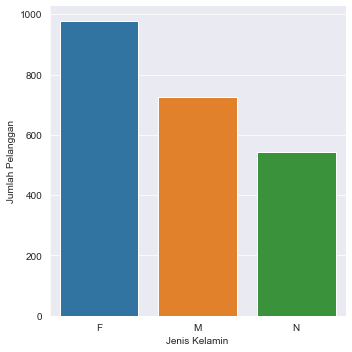

In [69]:
sns.catplot(x = 'gender', data = customers, kind = 'count').\
    set(xlabel = 'Jenis Kelamin', ylabel = 'Jumlah Pelanggan')
plt.show()

**Kita memiliki lebih banyak pelanggan yang lebih tua (<1990).**

Younger Millenials berjumlah paling sedikit, lalu Gen Z lebih banyak daripada Younger Millenials.

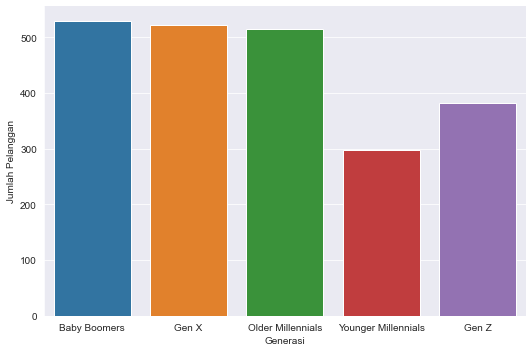

In [70]:
sns.catplot(x = 'generation', data = customers, kind = 'count', aspect = 1.5).\
    set(xlabel = 'Generasi', ylabel = 'Jumlah Pelanggan')
plt.show()

**Pelanggan perempuan mendominasi di setiap generasi.**

Jumlah pelanggan dengan jenis kelamin tidak diketahui meningkat sejak generasi Older Millennials (>=1980), lebih banyak daripada pelanggan laki-laki.

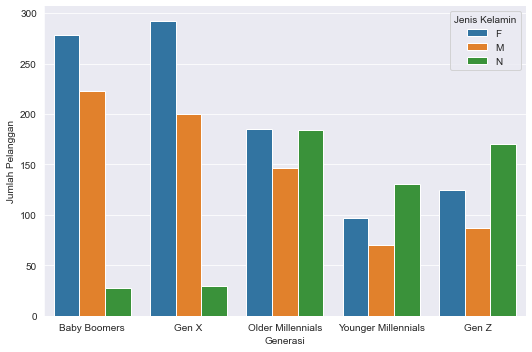

In [71]:
sns.catplot(x = 'generation', data = customers, hue = 'gender',
            kind = 'count', aspect = 1.5, legend = False).\
    set(xlabel = 'Generasi', ylabel = 'Jumlah Pelanggan')
plt.legend(title = 'Jenis Kelamin')
plt.show()

#### Bagaimana distribusi customers kita per (home) store?

**Jumlah pelanggan terbanyak berada pada _home store_ 5.**

Diikuti _home store_ 3, dan paling sedikit adalah _home store_ 8.

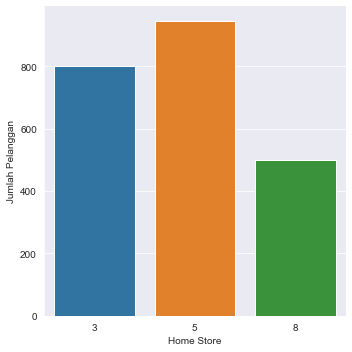

In [72]:
sns.catplot(x = 'home_store', data = customers, kind = 'count').\
    set(xlabel = 'Home Store', ylabel = 'Jumlah Pelanggan')
plt.show()

**Distribusi generasi setiap _home store_ berbeda-beda.**

- **_Home store_ 3**: pelanggan didominasi oleh <u>generasi lebih tua (<1980)</u>.  
- **_Home store_ 5**: pelanggan didominasi oleh <u>Older Millennials</u> dan <u>generasi yang lebih muda</u>.  
- **_Home store_ 8**: pelanggan dari <u>generasi lebih tua lebih banyak</u>, namun dengan <u>margin yang lebih sedikit</u>.

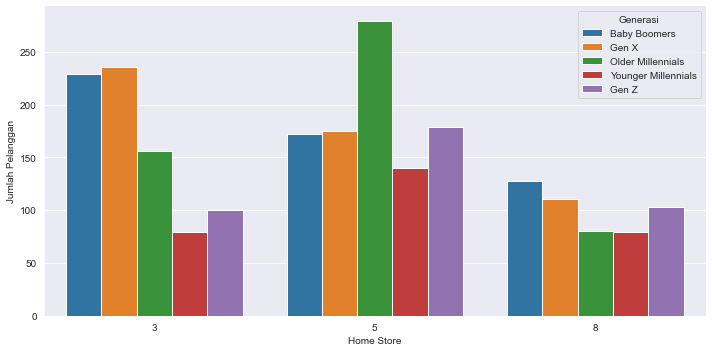

In [73]:
sns.catplot(x = 'home_store', data = customers, hue = 'generation',
            kind = 'count', legend = False, aspect = 2).\
    set(xlabel = 'Home Store', ylabel = 'Jumlah Pelanggan')
plt.legend(title = 'Generasi')
plt.show()

**Apabila usia pelanggan dirata-rata, maka _home store_ 3 memiliki pelanggan tertua, diikuti oleh _home store_ 8 dan diakhiri dengan _home store_ 5.**

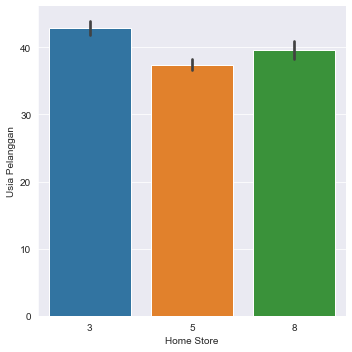

In [74]:
sns.catplot(x = 'home_store', y = 'customer_age', data = customers,
            kind = 'bar', estimator = np.mean).\
    set(xlabel = 'Home Store', ylabel = 'Usia Pelanggan')
plt.show()

**Secara jenis kelamin, distribusi pelanggan per _home store_ sesuai ekspetasi.**

Semua _home store_ lebih didominasi oleh pelanggan perempuan, kecuali _home store 5_ yang memiliki tingkat pelanggan dengan jenis kelamin tidak diketahui cukup banyak (kemungkinan besar karena efek distribusi usia dari _home store_ 5).

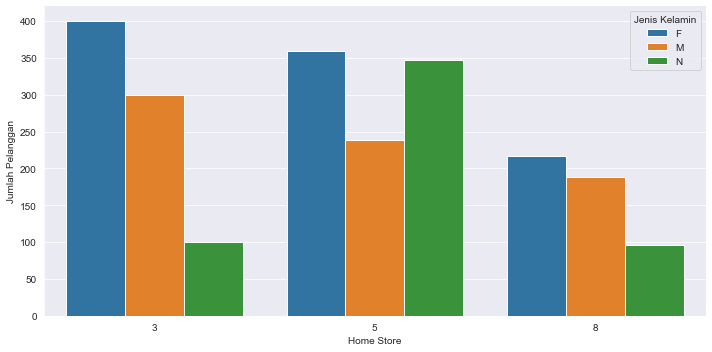

In [75]:
sns.catplot(x = 'home_store', data = customers, hue = 'gender',
            kind = 'count', legend = False, aspect = 2).\
    set(xlabel = 'Home Store', ylabel = 'Jumlah Pelanggan')
plt.legend(title = 'Jenis Kelamin')
plt.show()

#### Bagaimana taste customer kita per segmentasi?
Dianalisa menggunakan kategori produk, karena dirasa cukup dalam untuk memahami _taste_ pelanggan, tetapi tidak terlalu banyak sehingga pengelompokkan akan cukup efisien dan bermakna.

**Urutan kategori produk dengan penjualan tertinggi cukup mirip untuk setiap generasi, namun secara rasio berbeda satu sama lain.**

Pelanggan dari generasi yang lebih tua lebih menyukai kopi, secara relatif, dibandingkan pelanggan dari generasi lain.

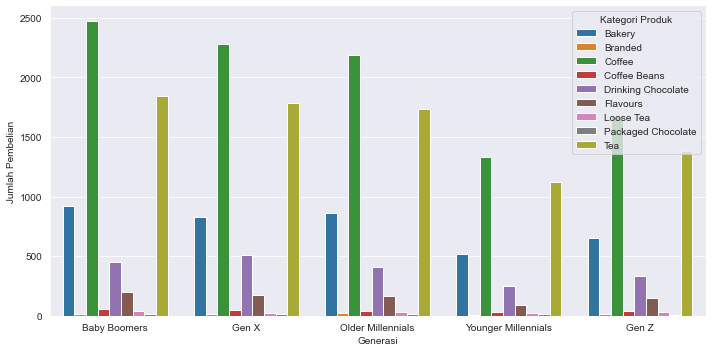

In [76]:
sns.catplot(x = 'generation', data = receipts, hue = 'product_category',
           kind = 'count', legend = False, aspect = 2).\
    set(xlabel = 'Generasi', ylabel = 'Jumlah Pembelian')
plt.legend(title = 'Kategori Produk')
plt.show()

**Setiap kategori memiliki rasio pembelian per segmen yang berbeda-beda:**
1. **Bakery** disukai oleh pelanggan dari generasi yang lebih tua, dipimpin oleh <u>Baby Boomers</u>.
2. **Drinking Chocolate** dan **Coffee Beans** mirip dengan <u>Bakery</u>, tetapi dengan margin yang lebih kecil.
3. **Coffee** dan **Tea** sama-sama didominasi oleh <u>generasi yang lebih tua (<=1990)</u>.
4. **Branded** didominasi pelanggan <u>Older Millennials</u>.
5. **Flavours** didominasi pelanggan <u>Baby Boomers</u>.
6. **Packaged Chocolate** memiliki penjualan yang relatif merata per setiap kategori, tetapi memiliki demand cukup kecil dari <u>Gen Z</u>.

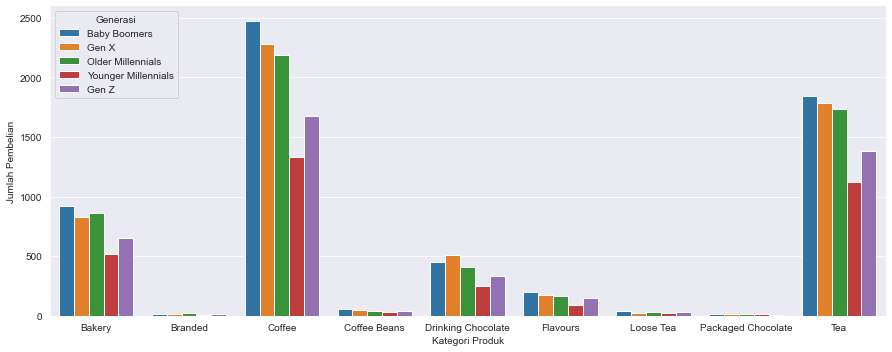

In [77]:
sns.catplot(x = 'product_category', data = receipts, hue = 'generation',
            kind = 'count', legend = False, aspect = 2.5).\
    set(xlabel = 'Kategori Produk', ylabel = 'Jumlah Pembelian')
plt.legend(title = 'Generasi')
plt.show()

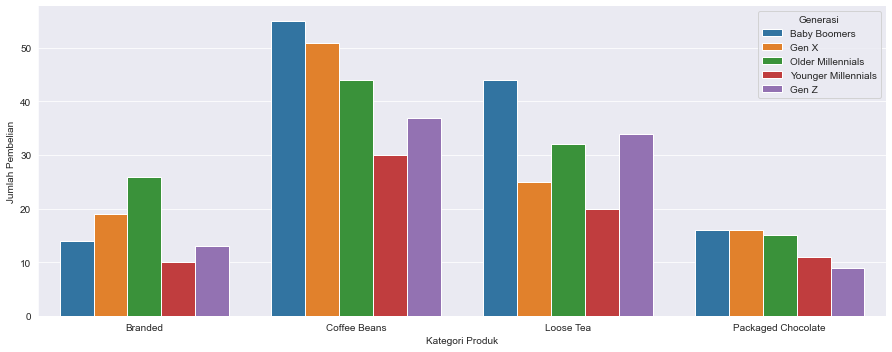

In [78]:
sns.catplot(x = 'product_category', data = receipts, hue = 'generation',
            kind = 'count', order = ['Branded', 'Coffee Beans',
                                    'Loose Tea', 'Packaged Chocolate'], 
            legend = False, aspect = 2.5).\
    set(xlabel = 'Kategori Produk', ylabel = 'Jumlah Pembelian')
plt.legend(title = 'Generasi')
plt.show()

**Urutan kategori produk dengan penjualan tertinggi juga cukup mirip untuk setiap jenis kelamin, dengan sedikit perbedaan secara rasio.**

Pelanggan dengan jenis kelamin tidak diketahui menyukai kopi lebih sedikit secara relatif.

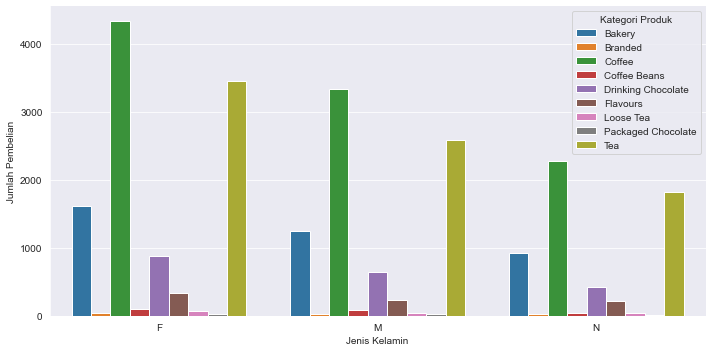

In [79]:
sns.catplot(x = 'gender', data = receipts, hue = 'product_category',
           kind = 'count', legend = False, aspect = 2).\
    set(xlabel = 'Jenis Kelamin', ylabel = 'Jumlah Pembelian')
plt.legend(title = 'Kategori Produk')
plt.show()

**Setiap kategori memiliki urutan yang sama, namun rasio pembelian yang sedikit berbeda:**
1. **Coffee**, **Tea**, dan **Coffee Beans** sangat didominasi pelanggan <u>perempuan</u>.
2. **Bakery**, **Drinking Chocolate**, **Loose Tea**, dan **Packaged Chocolate** juga didominasi pelanggan <u>perempuan</u>, namun dengan margin yang relatif lebih kecil.
3. **Flavours** and **Branded** memiliki penjualan yang relatif mirip antara pelanggan <u>laki-laki</u> dan pelanggan jenis kelamin <u>tidak diketahui</u>, namun memiliki penjualan yang relatif tinggi untuk pelanggan <u>perempuan</u>.

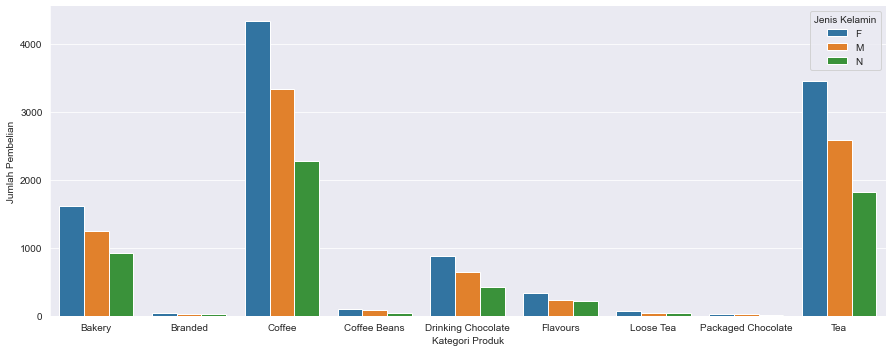

In [80]:
sns.catplot(x = 'product_category', data = receipts, hue = 'gender',
            kind = 'count', legend = False, aspect = 2.5).\
    set(xlabel = 'Kategori Produk', ylabel = 'Jumlah Pembelian')
plt.legend(title = 'Jenis Kelamin')
plt.show()

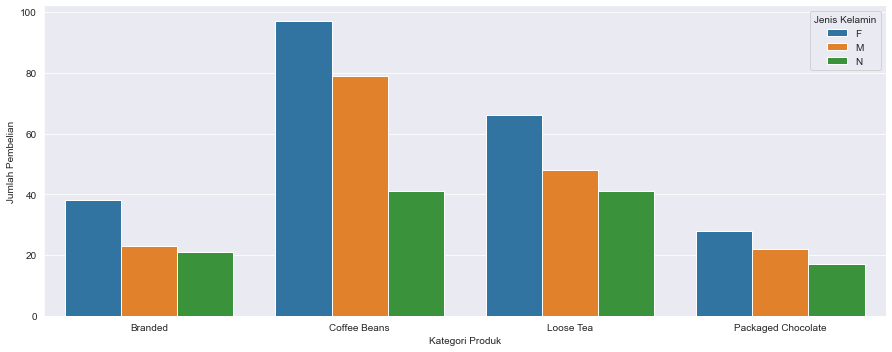

In [81]:
sns.catplot(x = 'product_category', data = receipts, hue = 'gender',
            kind = 'count', order = ['Branded', 'Coffee Beans',
                                    'Loose Tea', 'Packaged Chocolate'], 
            legend = False, aspect = 2.5).\
    set(xlabel = 'Kategori Produk', ylabel = 'Jumlah Pembelian')
plt.legend(title = 'Jenis Kelamin')
plt.show()

#### Siapakah customer kita yang merupakan customer terbesar?
Baik secara kontribusi pendapatan maupun keuntungan.

##### Pendapatan

**Pendapatan dari setiap pelanggan berpusat di sekitar \\$50, tetapi ada pelanggan-pelanggan yang memberikan pendapatan hingga lebih dari \\$100.**

In [82]:
print('Rata-rata pendapatan dari setiap pelanggan adalah $' + str(round(customers['customer_revenue'].mean(), 2)) +  '!')

Rata-rata pendapatan dari setiap pelanggan adalah $51.03!


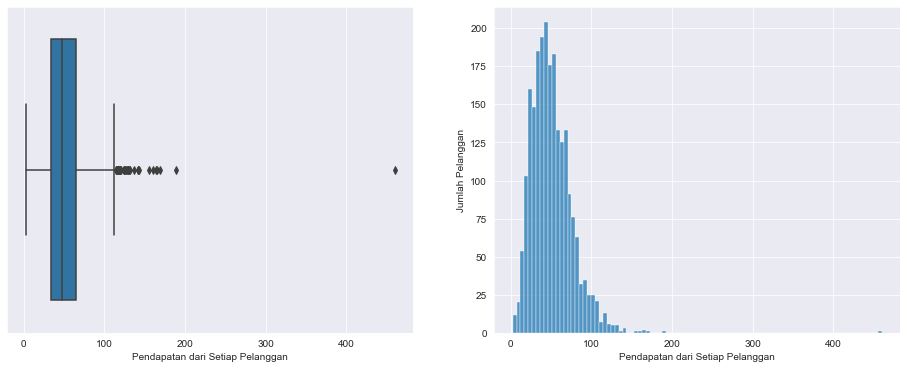

In [83]:
plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'customer_revenue', data = customers).set(xlabel = 'Pendapatan dari Setiap Pelanggan')

plt.subplot(1, 2, 2)
sns.histplot(x = 'customer_revenue', data = customers).\
    set(xlabel = 'Pendapatan dari Setiap Pelanggan', ylabel = 'Jumlah Pelanggan')

plt.show()

**Ada cukup banyak pelanggan yang memberikan pendapatan di atas \\$100!**

In [84]:
valuable_custs = customers[customers['customer_revenue'] > 100]
print(f'Ada {len(valuable_custs)} pelanggan yang memberikan pendapatan di atas $100.')

Ada 92 pelanggan yang memberikan pendapatan di atas $100.


**Secara generasi, terdapat lebih sedikit <u>Older Millennials</u> dalam pelanggan yang memberikan pendapatan di atas \\$100.**

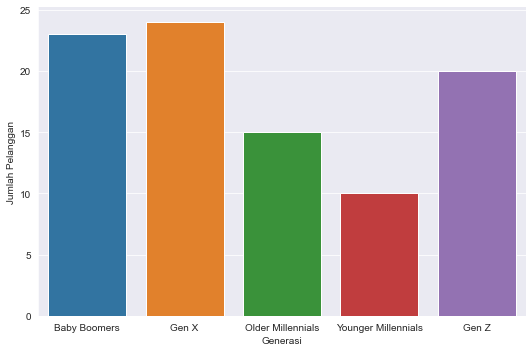

In [85]:
sns.catplot(x = 'generation', data = valuable_custs, 
            kind = 'count', aspect = 1.5).\
    set(xlabel = 'Generasi', ylabel = 'Jumlah Pelanggan')
plt.show()

**Tidak ada perbedaan khusus secara distribusi jenis kelamin dalam pelanggan yang menghasilkan pendapatan di atas \\$100.**

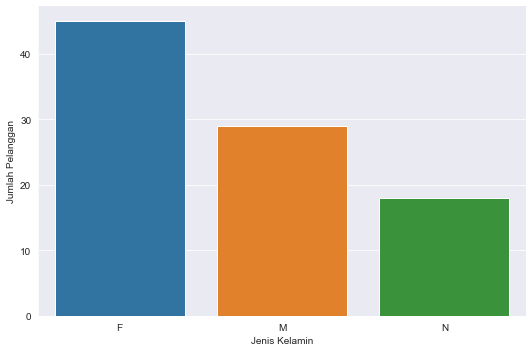

In [86]:
sns.catplot(x = 'gender', data = valuable_custs, 
            kind = 'count', aspect = 1.5).\
    set(xlabel = 'Jenis Kelamin', ylabel = 'Jumlah Pelanggan')
plt.show()

**Apabila segmentasi generasi dan jenis kelamin dilihat bersama-sama, ada beberapa pola menarik:**
1. Jumlah <u>Baby Boomers perempuan</u> relatif sedikit dalam grup pelanggan ini.
2. Akan tetapi, ada banyak <u>Gen X perempuan</u> dalam grup pelanggan ini (dan sedikit pelanggan <u>Gen X</u> dengan <u>jenis kelamin diketahui</u>).
3. Ada banyak pelanggan dengan <u>jenis kelamin tidak diketahui</u> pada generasi <u>Younger Millennials</u> dan <u>Gen Z</u> dalam grup pelanggan ini.

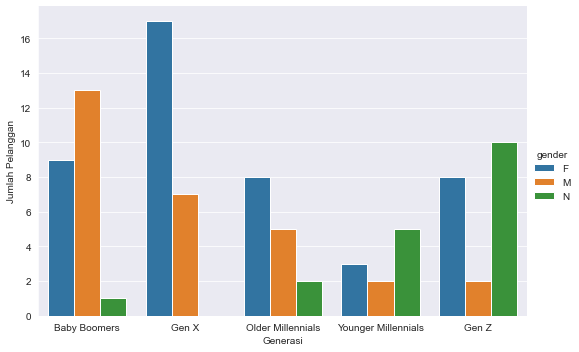

In [87]:
sns.catplot(x = 'generation', data = valuable_custs, hue = 'gender', 
            kind = 'count', aspect = 1.5).\
    set(xlabel = 'Generasi', ylabel = 'Jumlah Pelanggan')
plt.show()

##### Keuntungan

**Keuntungan dari setiap pelanggan berpusat di sekitar \\$15, tetapi ada pelanggan-pelanggan yang memberikan keuntungan hingga lebih dari \\$30.**

In [88]:
print('Rata-rata keuntungan dari setiap pelanggan adalah $' + str(round(customers['customer_profit'].mean(), 2)) +  '!')

Rata-rata keuntungan dari setiap pelanggan adalah $16.19!


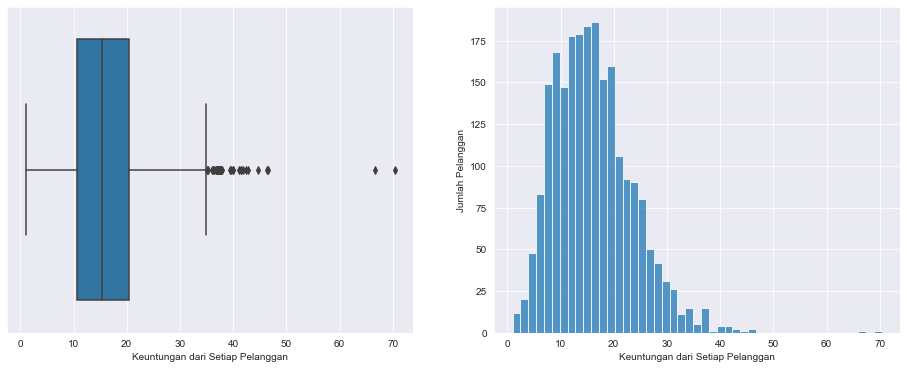

In [89]:
plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'customer_profit', data = customers).\
    set(xlabel = 'Keuntungan dari Setiap Pelanggan')

plt.subplot(1, 2, 2)
sns.histplot(x = 'customer_profit', data = customers).\
    set(xlabel = 'Keuntungan dari Setiap Pelanggan', ylabel = 'Jumlah Pelanggan')

plt.show()

**Ada cukup banyak pelanggan yang memberikan keuntungan di atas \\$30!**

In [90]:
valuable_custs = customers[customers['customer_profit'] > 30]
print(f'Ada {len(valuable_custs)} pelanggan yang memberikan keuntungan di atas $30.')

Ada 99 pelanggan yang memberikan keuntungan di atas $30.


**Secara generasi, terdapat lebih sedikit <u>Older Millennials</u> dalam pelanggan yang memberikan keuntungan di atas \\$30.**

Konsisten dengan pengelompokkan secara pendapatan sebelumnya.

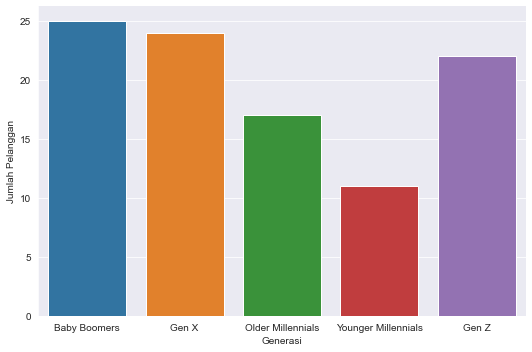

In [91]:
sns.catplot(x = 'generation', data = valuable_custs, 
            kind = 'count', aspect = 1.5).\
    set(xlabel = 'Generasi', ylabel = 'Jumlah Pelanggan')
plt.show()

**Tidak ada perbedaan khusus secara distribusi jenis kelamin dalam pelanggan yang menghasilkan keuntungan di atas \\$30.**

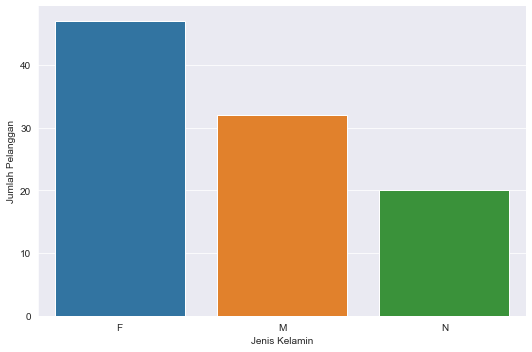

In [92]:
sns.catplot(x = 'gender', data = valuable_custs, 
            kind = 'count', aspect = 1.5).\
    set(xlabel = 'Jenis Kelamin', ylabel = 'Jumlah Pelanggan')
plt.show()

**Apabila segmentasi generasi dan jenis kelamin dilihat bersama-sama, ada beberapa pola menarik:**
1. Jumlah <u>Baby Boomers perempuan</u> relatif sedikit dalam grup pelanggan ini
2. Akan tetapi, ada banyak <u>Gen X perempuan</u> dalam grup pelanggan ini (dan sedikit pelanggan <u>Gen X</u> dengan <u>jenis kelamin diketahui</u>)
3. Ada banyak pelanggan dengan <u>jenis kelamin tidak diketahui</u> pada generasi <u>Younger Millennials</u> dan <u>Gen Z</u> dalam grup pelanggan ini
4. Hanya sedikit pelanggan <u>Younger Millennials perempuan</u> dalam grup pelanggan ini

_Penemuan nomor 1-3 mirip dengan penemuan pada grup pelanggan dengan kontribusi pendapatan terbesar, namun penemuan nomor 4 merupakan hal baru untuk grup pelanggan ini._

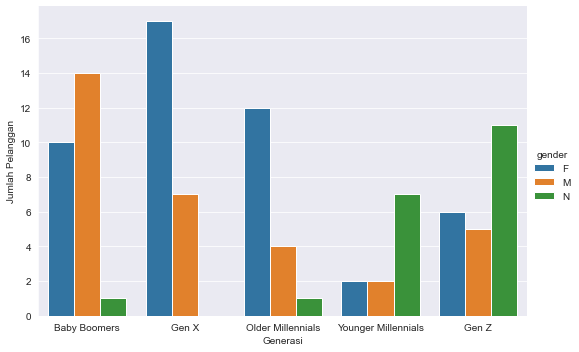

In [93]:
sns.catplot(x = 'generation', data = valuable_custs, hue = 'gender', 
            kind = 'count', aspect = 1.5).\
    set(xlabel = 'Generasi', ylabel = 'Jumlah Pelanggan')
plt.show()

### Product Recommendation
**Memberikan product recommendation agar bisa meningkatkan _revenue_**
- Jenis produk manakah yang merupakan kontributor utama pendapatan kita?
- Produk apakah yang populer di setiap tokonya?
- Produk-produk manakah kontributor profit terbesar kita?
- Produk baru manakah yang perlu dipertahankan atau dibuang?

#### Jenis produk manakah yang merupakan kontributor utama pendapatan kita?
Dianalisa menggunakan kategori produk, karena dirasa cukup dalam untuk memahami taste pelanggan, tetapi tidak terlalu banyak sehingga pengelompokkan akan cukup efisien dan bermakna.

**5 besar kontributor pendapatan kita, secara berurutan, adalah Coffee, Tea, Bakery, Drinking Chocolate, dan Coffee Beans.**

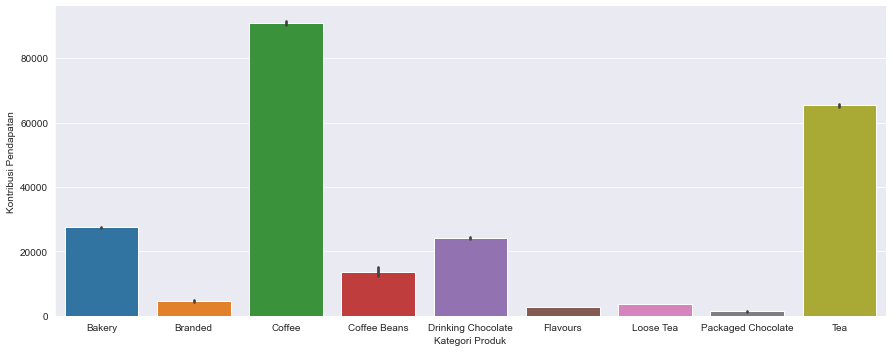

In [94]:
sns.catplot(x = 'product_category', y = 'order_revenue', data = receipts,
            kind = 'bar', estimator = np.sum, aspect = 2.5).\
    set(xlabel = 'Kategori Produk', ylabel = 'Kontribusi Pendapatan')
plt.show()

#### Produk apakah yang populer di setiap tokonya?
Didefinisikan secara kuantitas dan juga pendapatan.

**Distribusi pendapatan pada outlet 3 relatif mirip dengan outlet 5, sementara outlet 8 cukup unik.**

- **Outlet 3** memiliki penjualan <u>Flavours</u> di bawah rata-rata.
- **Outlet 5** memiliki penjualan <u>Flavours</u> di atas rata-rata dan <u>Tea</u> sedikit di bawah rata-rata.
- **Outlet 8** memiliki penjualan <u>Coffee Beans</u> dan <u>Loose Tea</u> di atas rata-rata, tetapi memiliki penjualan <u>Branded</u> di bawah rata-rata.

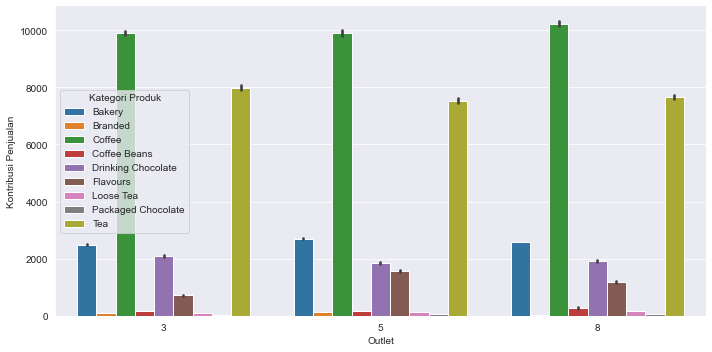

In [95]:
sns.catplot(x = 'sales_outlet_id', y = 'quantity', data = receipts, 
            hue = 'product_category',
            kind = 'bar', estimator = np.sum, legend = False, aspect = 2).\
    set(xlabel = 'Outlet', ylabel = 'Kontribusi Penjualan')
plt.legend(title = 'Kategori Produk')
plt.show()

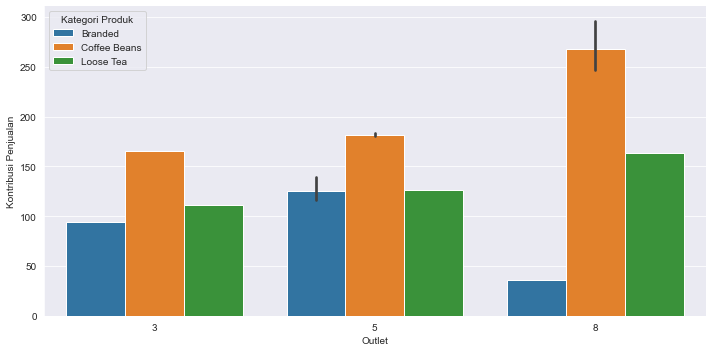

In [96]:
sns.catplot(x = 'sales_outlet_id', y = 'quantity', data = receipts, 
            hue = 'product_category', hue_order = ['Branded', 'Coffee Beans', 
                                                   'Loose Tea'],
            kind = 'bar', estimator = np.sum, legend = False, aspect = 2).\
    set(xlabel = 'Outlet', ylabel = 'Kontribusi Penjualan')
plt.legend(title = 'Kategori Produk')
plt.show()

**Distribusi pendapatan pada outlet 3 relatif mirip dengan outlet 5, sementara outlet 8 cukup unik.**

1. **Outlet 3** memiliki penjualan <u>Flavours</u> di bawah rata-rata
2. **Outlet 5** memiliki penjualan <u>Flavours</u> di atas rata-rata dan <u>Tea</u> sedikit di bawah rata-rata
3. **Outlet 8** memiliki penjualan <u>Coffee Beans</u> dan <u>Loose Tea</u> di atas rata-rata, tetapi memiliki penjualan <u>Branded</u> di bawah rata-rata

_Dengan kata lain, distribusi secara kuantitas dan pendapatan sebenarnya kurang lebih sama persis._

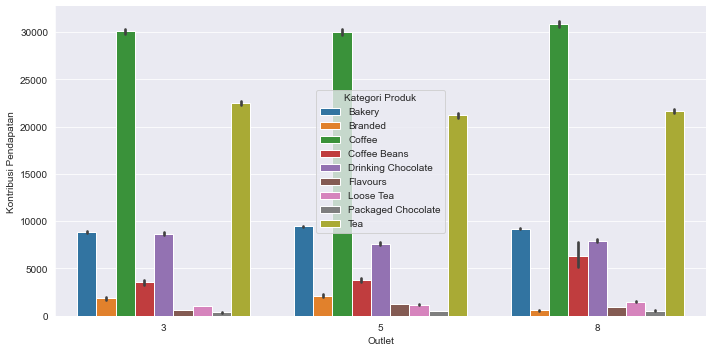

In [97]:
sns.catplot(x = 'sales_outlet_id', y = 'order_revenue', data = receipts, 
            hue = 'product_category',
            kind = 'bar', estimator = np.sum, legend = False, aspect = 2).\
    set(xlabel = 'Outlet', ylabel = 'Kontribusi Pendapatan')
plt.legend(title = 'Kategori Produk')
plt.show()

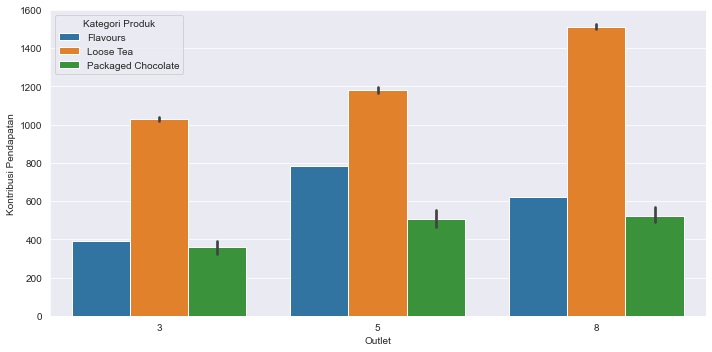

In [98]:
sns.catplot(x = 'sales_outlet_id', y = 'unit_price', data = receipts, 
            hue = 'product_category', hue_order = ['Flavours', 'Loose Tea', 
                                                   'Packaged Chocolate'],
            kind = 'bar', estimator = np.sum, legend = False, aspect = 2).\
    set(xlabel = 'Outlet', ylabel = 'Kontribusi Pendapatan')
plt.legend(title = 'Kategori Produk')
plt.show()

#### Produk-produk manakah kontributor profit terbesar kita?
Secara kategori produk, diikuti per produk dalam kategori produk bagi kategori produk dengan performance terbaik.

##### Level Kategori Produk

**Kontributor terbesar keuntungan kita, dengan margin yang cukup jauh, adalah <u>Coffee</u> dan <u>Tea</u>.**

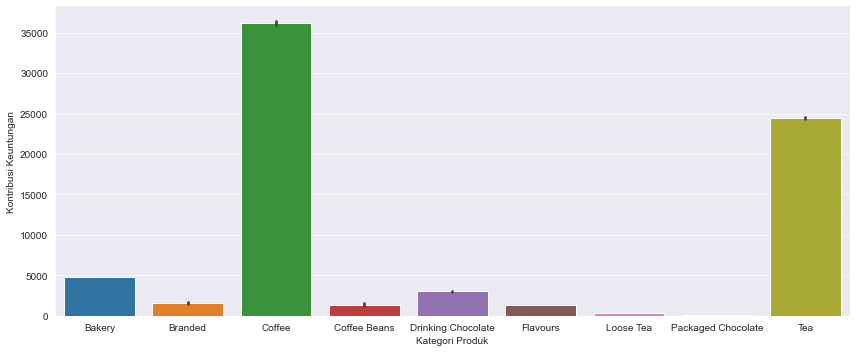

In [99]:
sns.catplot(x = 'product_category', y = 'order_profit', data = receipts,
            kind = 'bar', estimator = np.sum, aspect = 2.4).\
    set(xlabel = 'Kategori Produk', ylabel = 'Kontribusi Keuntungan')
plt.show()

**Mengapa kita perlu memperhatikan Branded dan Coffee Beans tadi? Karena mereka adalah kontributor terbaik secara profit per unit, sehingga karena itu kita menargetkan mereka.**

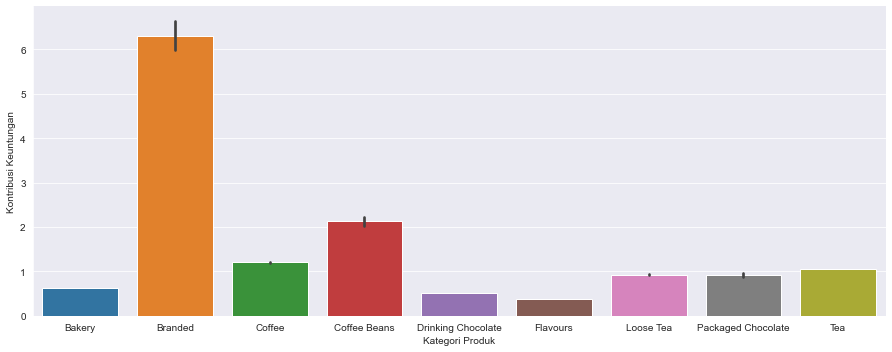

In [100]:
sns.catplot(x = 'product_category', y = 'unit_profit', data = receipts,
            kind = 'bar', estimator = np.mean, aspect = 2.5).\
    set(xlabel = 'Kategori Produk', ylabel = 'Kontribusi Keuntungan')
plt.show()

**Melihat dari hasil analisis sejauh ini, kategori yang akan diperiksa adalah:**

1. **Coffee** dan **Tea** sebagai <u>kontributor keuntungan total terbesar</u>
2. **Branded** dan **Coffee Beans** sebagai <u>kontributor keuntungan per unit terbesar</u>

##### Level Produk

###### Coffee

**Kontributor total keuntungan terbesar (>=\\$2000), secara berurutan, adalah:**

Latte Rg, Cappucino Lg, Latte, Jamaican Coffee River Lg, Cappucino, Brazillian Lg, dan Ethiopia Lg. Sebagian besar produk paling laris adalah ukuran Lg!

_Namun perlu digarisbawahi bahwa produk dipisahkan secara ukuran juga, padahal sebenarnya itu adalah produk yang sama. <u>Oleh karena itu, analisis yang lebih dalam akan dilakukan untuk menemukan produk yang disukai pelanggan terlepas dari ukurannya.</u>_

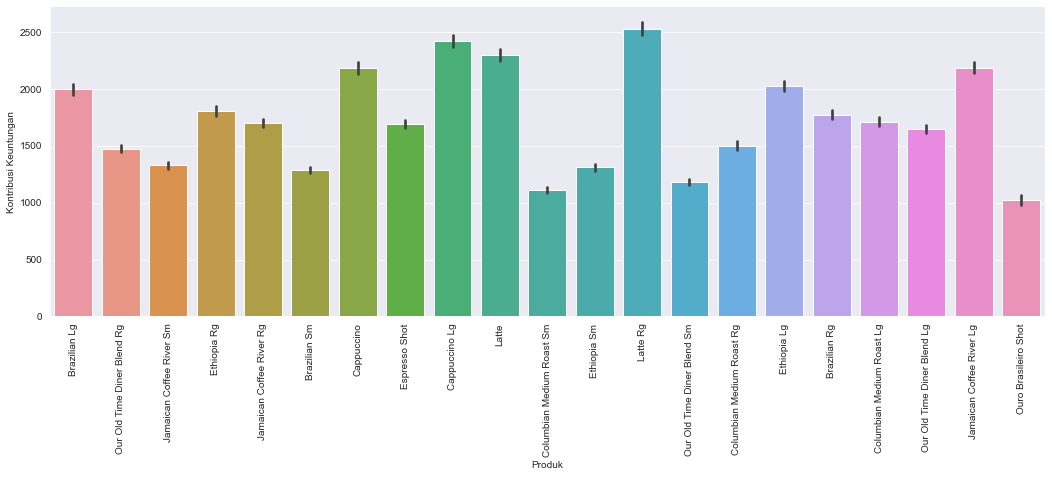

In [101]:
coffee = receipts[receipts['product_category'] == 'Coffee']
sns.catplot(x = 'product', y = 'order_profit', data = coffee,
            kind = 'bar', estimator = np.sum, aspect = 3).\
    set(xlabel = 'Produk', ylabel = 'Kontribusi Keuntungan')
plt.xticks(rotation = 90)
plt.show()

**Dapat disimpulkan bahwa kontributor keuntungan terbaik dari <u>Coffee</u> adalah <u>Jamaican Coffee River</u>, <u>Brazilian</u>, dan <u>Ethiopia</u>.**

_Kontributor keuntungan terburuk adalah Espresso dan Ouro Brasiliero._

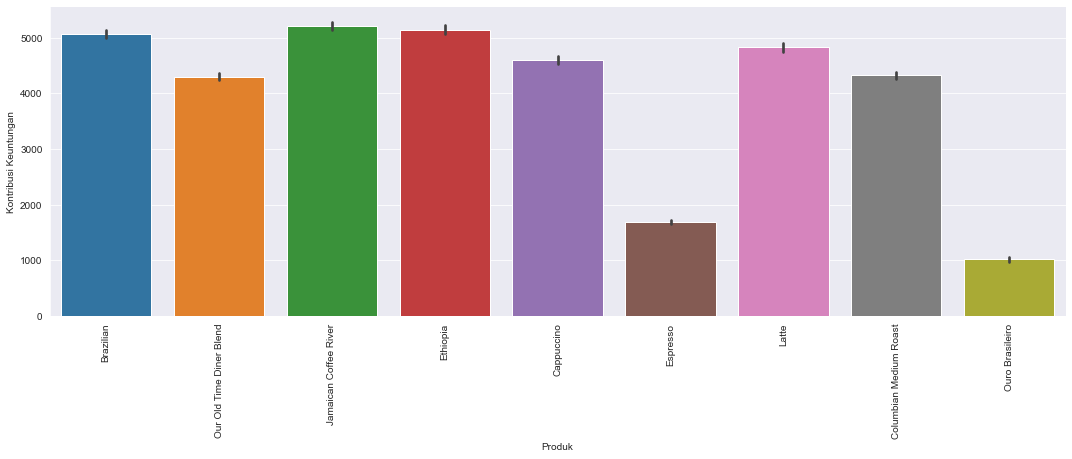

In [102]:
coffee['product'] = coffee['product'].\
                        str.replace('(Lg|Rg|Sm|shot)', '', case = False, regex = True).\
                        str.strip()
sns.catplot(x = 'product', y = 'order_profit', data = coffee,
            kind = 'bar', estimator = np.sum, aspect = 3).\
    set(xlabel = 'Produk', ylabel = 'Kontribusi Keuntungan')
plt.xticks(rotation = 90)
plt.show()

**Namun secara keuntungan per unit, <u>Cappucino</u> dan <u>Latte</u> adalah kontributor terbesar.**

Karena rumus keuntungan adalah _keuntungan per unit_ * _kuantitas_, indikasinya adalah ketiga kontributor keuntungan total terbesar sebelumnya banyak dibeli orang, sehingga dapat menutup jarak margin keuntungan.

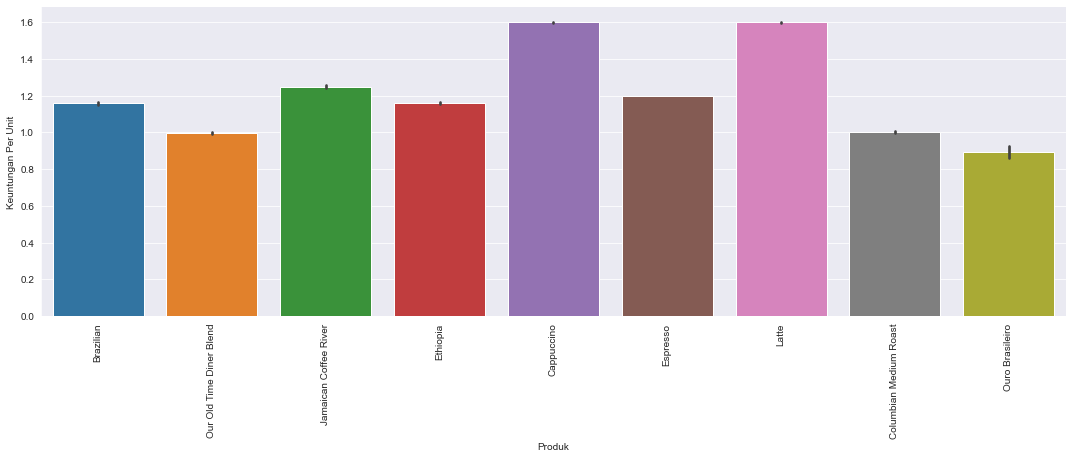

In [103]:
sns.catplot(x = 'product', y = 'unit_profit', data = coffee,
            kind = 'bar', estimator = np.mean, aspect = 3).\
    set(xlabel = 'Produk', ylabel = 'Keuntungan Per Unit')
plt.xticks(rotation = 90)
plt.show()

###### Tea

**Kontributor total keuntungan terbesar (>=\\$2000) adalah <u>Morning Sunrise Chai Lg</u>, dengan margin yang cukup jauh, dan secara umum didominasi oleh ukuran Lg.**

_Namun perlu digarisbawahi bahwa produk dipisahkan secara ukuran juga, padahal sebenarnya itu adalah produk yang sama. <u>Oleh karena itu, analisis yang lebih dalam akan dilakukan untuk menemukan produk yang disukai pelanggan terlepas dari ukurannya.</u>_

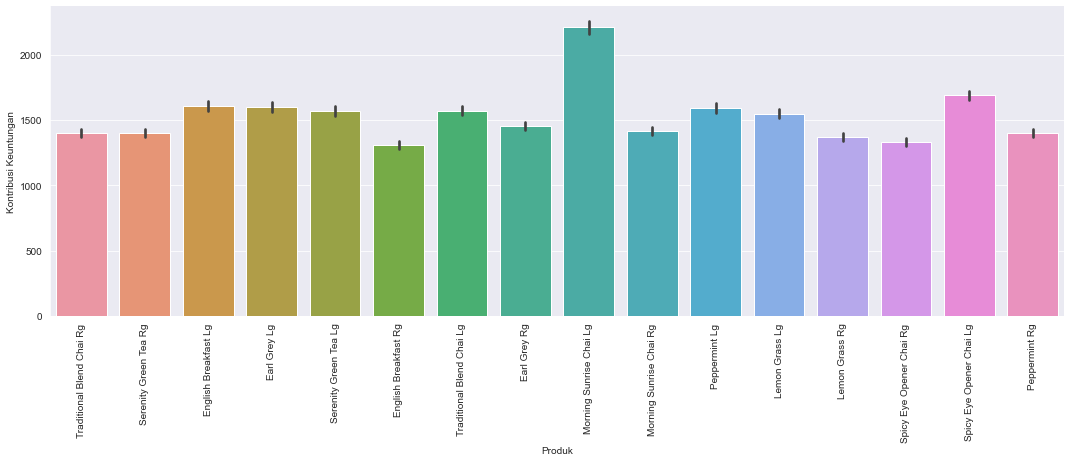

In [104]:
tea = receipts[receipts['product_category'] == 'Tea']
sns.catplot(x = 'product', y = 'order_profit', data = tea,
            kind = 'bar', estimator = np.sum, aspect = 3).\
    set(xlabel = 'Produk', ylabel = 'Kontribusi Keuntungan')
plt.xticks(rotation = 90)
plt.show()

**Kontributor keuntungan terbaik dari <u>Tea</u> tetap <u>Morning Sunrise Chai</u>, dengan margin yang cukup jauh!**

Secara garis besar, distribusi dalam keuntungan per unit juga cukup mirip. 

_Semua produk lain memiliki tingkat keuntungan yang cukup merata (perbedaan tidak terlalu signifikan)._

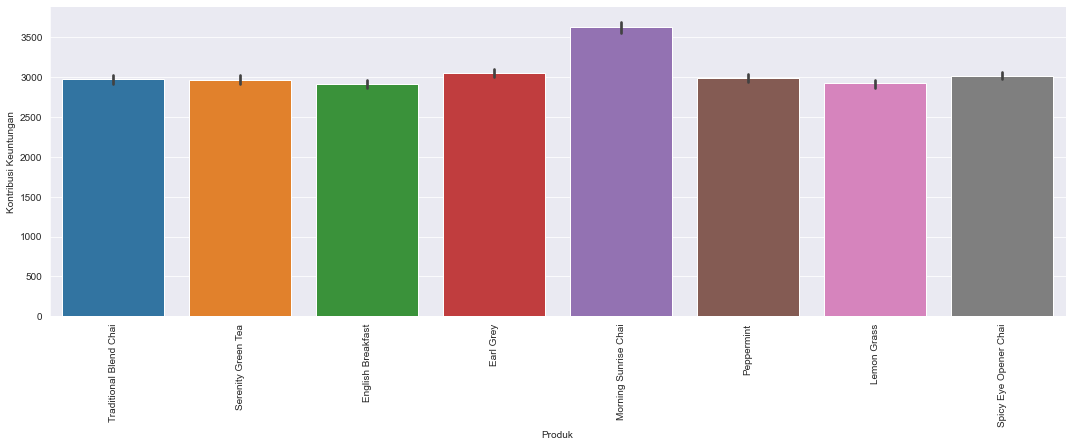

In [105]:
tea['product'] = tea['product'].\
                    str.replace('(Lg|Rg|Sm|shot)', '', case = False, regex = True).\
                    str.strip()
sns.catplot(x = 'product', y = 'order_profit', data = tea,
            kind = 'bar', estimator = np.sum, aspect = 3).\
    set(xlabel = 'Produk', ylabel = 'Kontribusi Keuntungan')
plt.xticks(rotation = 90)
plt.show()

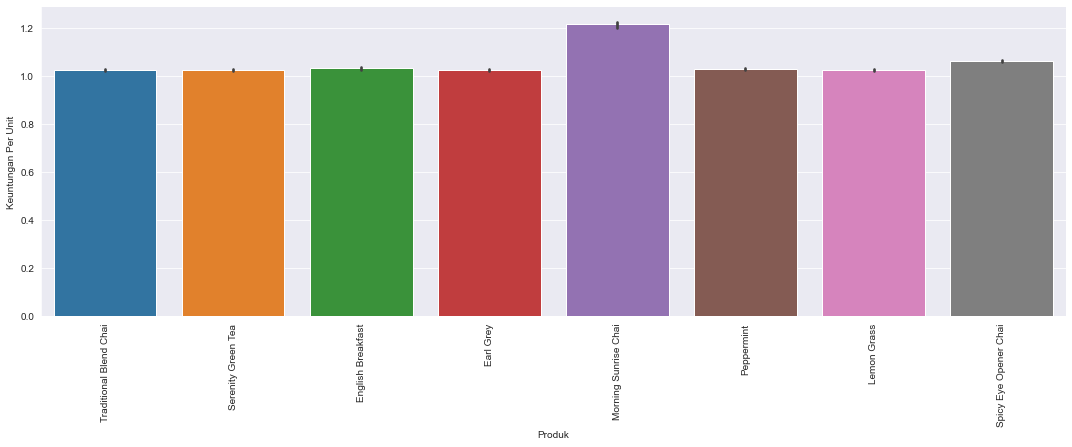

In [106]:
sns.catplot(x = 'product', y = 'unit_profit', data = tea,
            kind = 'bar', estimator = np.mean, aspect = 3).\
    set(xlabel = 'Produk', ylabel = 'Keuntungan Per Unit')
plt.xticks(rotation = 90)
plt.show()

###### Branded

**Kontributor total keuntungan terbesar (>=\\$2000) adalah <u>I Need My Bean! T-Shirt</u>, dengan margin yang cukup jauh.**

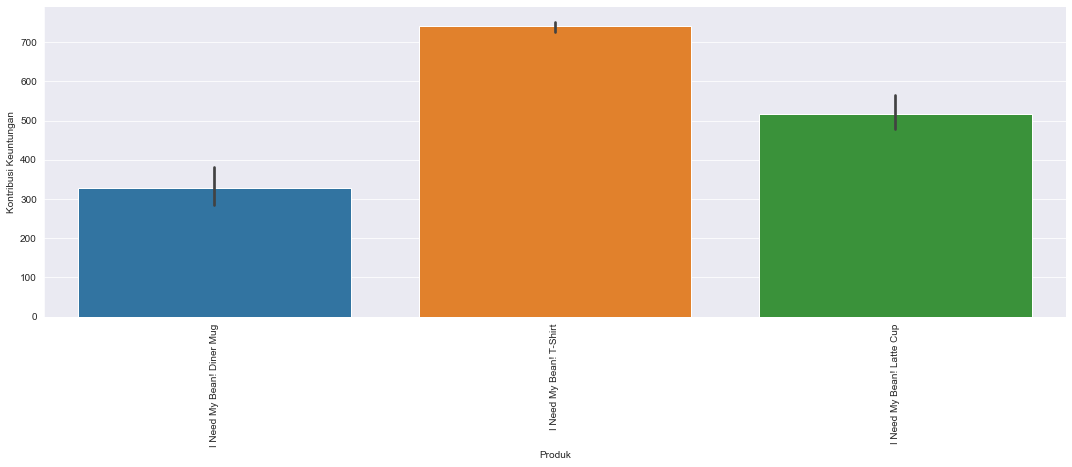

In [107]:
branded = receipts[receipts['product_category'] == 'Branded']
sns.catplot(x = 'product', y = 'order_profit', data = branded,
            kind = 'bar', estimator = np.sum, aspect = 3).\
    set(xlabel = 'Produk', ylabel = 'Kontribusi Keuntungan')
plt.xticks(rotation = 90)
plt.show()

Dengan skala dan distribusi keuntungan per unit yang nyaris sama persis dengan keuntungan total, rupanya **sebagian besar pelanggan Branded membeli hanya satu unit produk Branded per pembelian.**

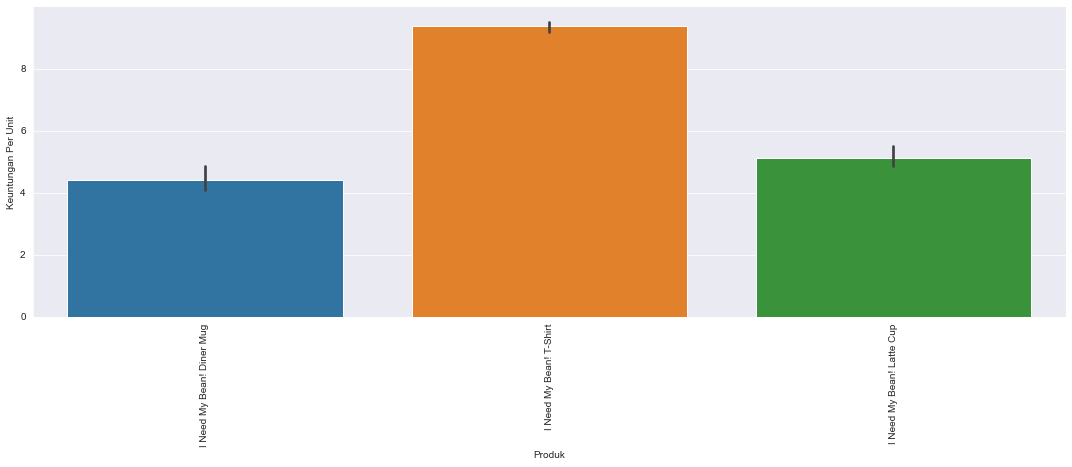

Rata-rata pelanggan membeli 1.04 barang branded dalam satu order.


In [108]:
sns.catplot(x = 'product', y = 'unit_profit', data = branded,
            kind = 'bar', estimator = np.mean, aspect = 3).\
    set(xlabel = 'Produk', ylabel = 'Keuntungan Per Unit')
plt.xticks(rotation = 90)
plt.show()

print('Rata-rata pelanggan membeli ' + str(round(branded['quantity'].mean(), 2)) + ' barang branded dalam satu order.')

###### Coffee Beans

**Kontributor total keuntungan terbesar (>=\\$2000) adalah <u>Civet Cat</u>, dengan margin yang cukup jauh, diikuti oleh <u>Organic Decaf Blend</u> pada urutan kedua.**

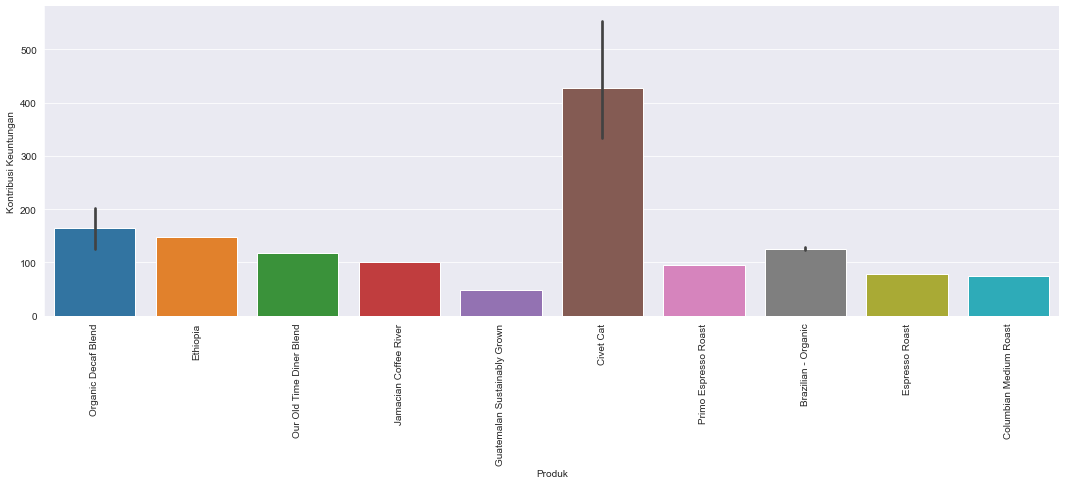

In [109]:
coffee_beans = receipts[receipts['product_category'] == 'Coffee Beans']
sns.catplot(x = 'product', y = 'order_profit', data = coffee_beans,
            kind = 'bar', estimator = np.sum, aspect = 3).\
    set(xlabel = 'Produk', ylabel = 'Kontribusi Keuntungan')
plt.xticks(rotation = 90)
plt.show()

**Kontributor keuntungan terbaik dari <u>Coffee Beans</u> tetap <u>Civet Cat</u>, dengan margin yang cukup jauh.**

Diikuti dengan Organic Decaf Blend pada urutan kedua, persis seperti sebelumnya.

_Kontributor keuntungan terburuk adalah Guatemalan Sustainably Grown._

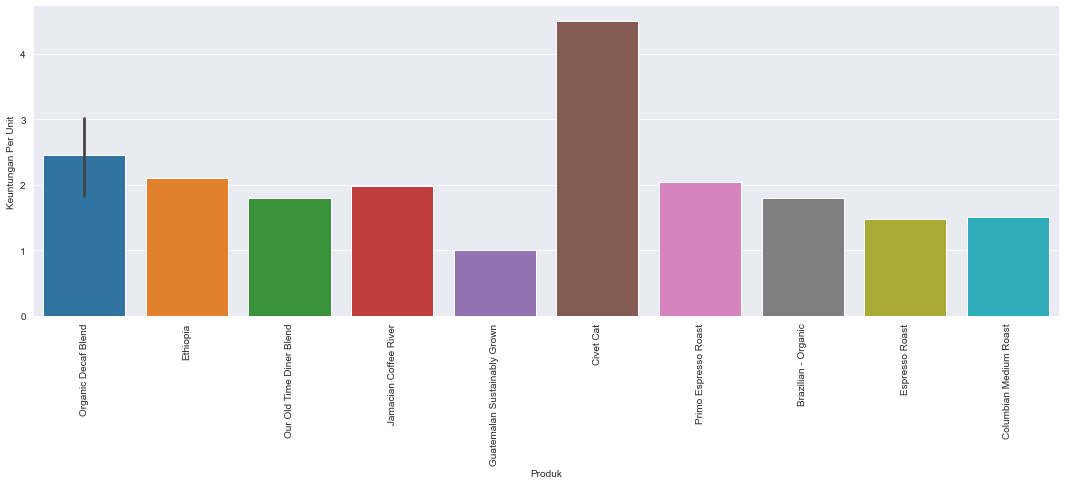

In [110]:
sns.catplot(x = 'product', y = 'unit_profit', data = coffee_beans,
            kind = 'bar', estimator = np.mean, aspect = 3).\
    set(xlabel = 'Produk', ylabel = 'Keuntungan Per Unit')
plt.xticks(rotation = 90)
plt.show()

#### Produk baru manakah yang perlu dipertahankan atau dibuang?

**Kita memiliki dua produk baru yang sedang dijual sekarang: <u>Happy Holidays Hot Chocolate</u> dan <u>Rio Nights</u>.**

Kedua produk idealnya akan dibandingkan secara _performance_ melalui kuantitas dan total pendapatan dengan produk-produk di kategori yang sama.

In [111]:
products[products['new_product_yn'] == 'Y']

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,current_average_price
67,68,Beverages,Drinking Chocolate,Seasonal drink,Happy Holidays Hot Chocolate,"Candy cane and hot chocolate, perfect.",8 oz,2.81,3.75,Y,Y,Y,3.28
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,2 shots of Ouro Brasilerio and pure cane sugar...,6 oz,1.20,6.00,Y,N,Y,3.60


**Namun analisis ini belum dapat dilakukan, karena produk-produk tersebut nampaknya belum dijual dalam data ini (April 2019).**

Atau belum laku sama sekali bulan ini, tetapi nampaknya kemungkinannya kecil benar-benar 0 unit terjual?

In [112]:
receipts[receipts['new_product_yn'] == 'Y']

,transaction_id,transaction_timestamp,sales_outlet_id,staff_id,customer_id,instore_yn,product_id,quantity,unit_price,promo_item_yn,...,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,current_average_price,order_profit,unit_profit


### Inventory Optimization
**Mengoptimalisasi stok atau mengurangi stok produk agar tidak banyak yang terbuang**
- Apa yang perlu dilakukan dengan waste pastry inventory kita?
- Berapa stok yang semestinya kita maintain untuk setiap jenis produk kita?
- Berapakah inventory yang perlu dimaintain oleh setiap toko?
- Adakah variasi khusus dalam penjualan produk selama sebulan yang dapat berpengaruh terhadap pengaturan stok barang?

#### Apa yang perlu dilakukan dengan waste pastry inventory kita?
Sebelum memulai analisis, eksplorasi singkat pada _pastry waste_ akan dilakukan terlebih dahulu.

**Rata-rata _pastry waste_ kita begitu tinggi, nyaris 60%!**

Sebagian besar di atas 40%, dan ada pula _waste_ hingga 100%. Nampak jelas sekali bahwa masalah _waste_ ini adalah masalah yang cukup besar dan harus segera ditangani.

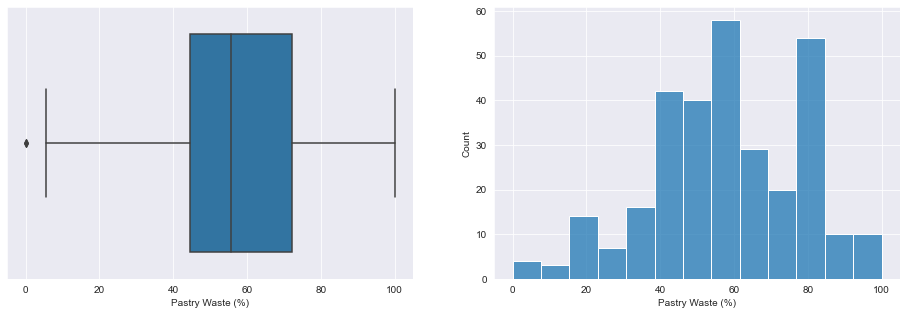

Rata-rata pastry waste kita adalah 57.85%!


In [113]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x = '% waste', data = pastry_invts).set(xlabel = 'Pastry Waste (%)')

plt.subplot(1, 2, 2)
sns.histplot(x = '% waste', data = pastry_invts).set(xlabel = 'Pastry Waste (%)')

plt.show()

print('Rata-rata pastry waste kita adalah ' +\
      str(round(pastry_invts['% waste'].mean(), 2)) + '%!')

**_Pastry waste_ dengan rata-rate tertinggi dikontribusikan oleh <u>Ginger Scone</u>, dengan tingkat rata-rata _pastry waste_ 70% (!!).**

_Semua produk lain yang ada di daftar ini juga memiliki rata-rata _waste_ di atas 50%._ 

Perhatikan bahwa cukup jelas tidak semua produk dimasukkan dalam data ini, dan mungkin ada lebih banyak produk lain dengan _waste_ yang tidak ditampilkan di sini.

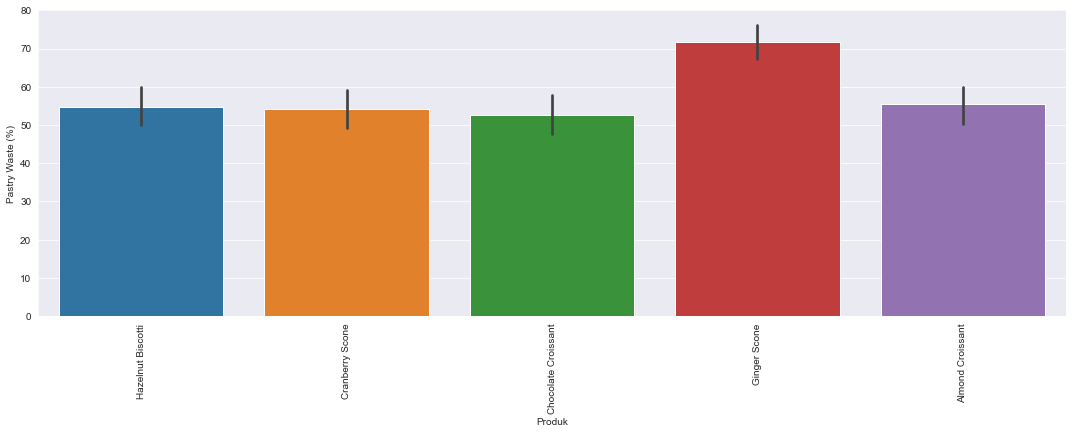

In [114]:
sns.catplot(x = 'product', y = '% waste', data = pastry_invts,
            kind = 'bar', estimator = np.mean, aspect = 3).\
    set(xlabel = 'Produk', ylabel = 'Pastry Waste (%)')
plt.xticks(rotation = 90)
plt.show()

##### Dimanakah waste terjadi?
Lebih tepatnya, di toko manakah ini terjadi, dan bagaimana distribusinya?

**Distribusi _pastry waste_ bervariasi per outlet, tetapi <u>outlet 3</u> mempertahankan level yang sedikit lebih tinggi dibandingkan outlet-outlet lain.**

**Outlet 3**: Lebih tinggi untuk <u>Hazelnut Biscotti</u>, <u>Cranberry Scone</u>, dan <u>Almond Croissant.</u>  
**Outlet 5**: Lebih tinggi untuk <u>Chocolate Croissant.</u>  
**Outlet 8**: <u>Mempertahankan level yang cukup rendah untuk semua produk!</u>

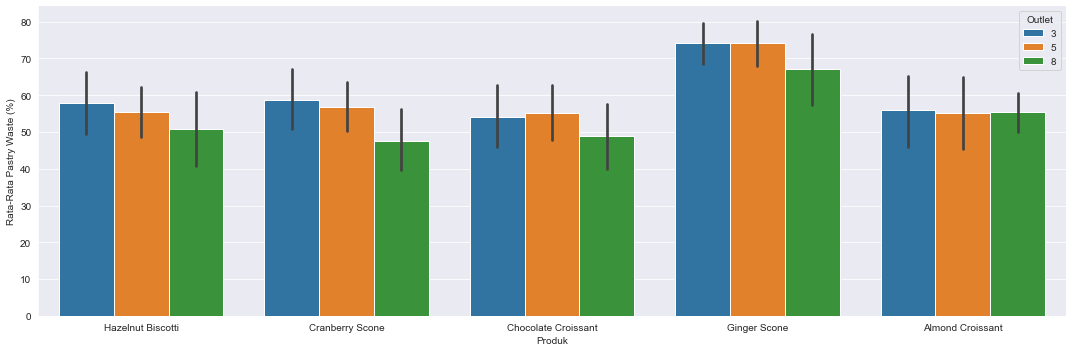

In [115]:
sns.catplot(x = 'product', y = '% waste', data = pastry_invts,
            hue = 'sales_outlet_id', kind = 'bar', 
            estimator = np.mean, legend = False, aspect = 3).\
    set(xlabel = 'Produk', ylabel = 'Rata-Rata Pastry Waste (%)')
plt.legend(title = 'Outlet')
plt.show()

##### Kapan waste terjadi?
Apakah ada pola pada _pastry waste_ secara waktu?

**Tidak ada pola hari khusus, selain Selasa nampaknya sedikit lebih tinggi dibandingkan hari lain.**

Hari dengan rata-rata _pastry waste_ terendah adalah Minggu, dengan margin cukup kecil.

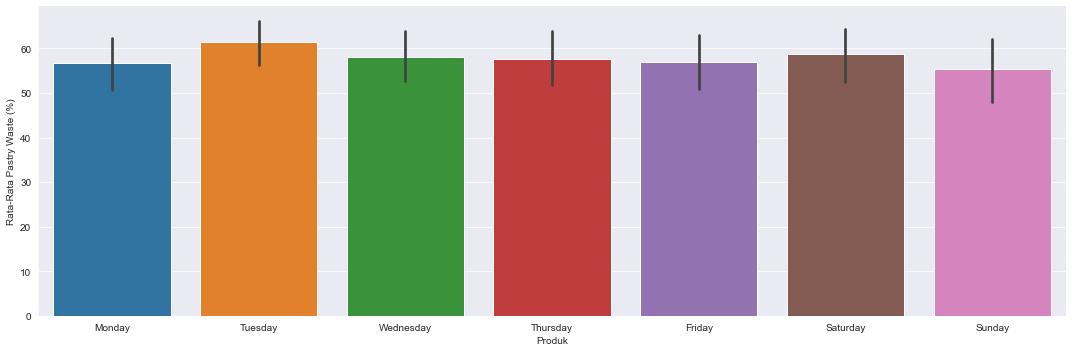

In [116]:
sns.catplot(x = 'transaction_weekday', y = '% waste', data = pastry_invts,
            kind = 'bar', estimator = np.mean, aspect = 3).\
    set(xlabel = 'Produk', ylabel = 'Rata-Rata Pastry Waste (%)')
plt.show()

##### Berapa jumlah pastry yang idealnya dibuat agar tidak terjadi waste?

**Runyamnya, ada banyak variasi dalam penjualan _pastry_, sehingga perlu penyelidikan lebih lanjut tentang angka produksi yang tepat.**

Seperti kita ketahui sebelumnya, ginger scone memiliki _waste_ yang sangat tinggi. Apakah ternyata itu sejalan dengan variabilitasnya?

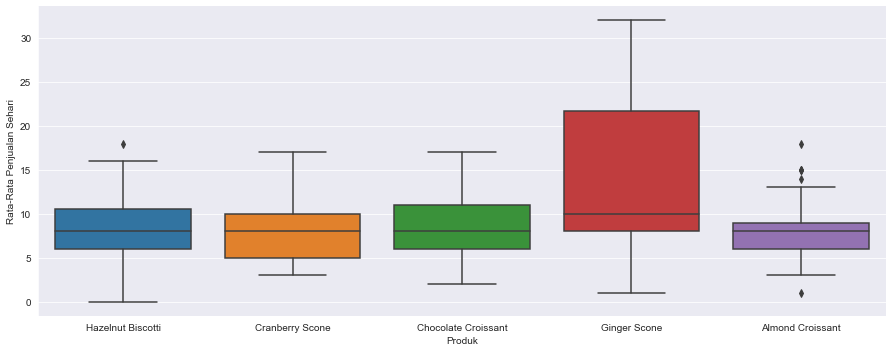

In [117]:
sns.catplot(x = 'product', y = 'quantity_sold', data = pastry_invts,
            kind = 'box', aspect = 2.5).\
    set(xlabel = 'Produk', ylabel = 'Rata-Rata Penjualan Sehari')
plt.show()

**Dalam menentukan harga, kita perlu menentukan berdasarkan _trade-off_ antara biaya dari _waste_ pada grafik sebelah kiri dan keuntungan per unit pada grafik sebelah kanan.**

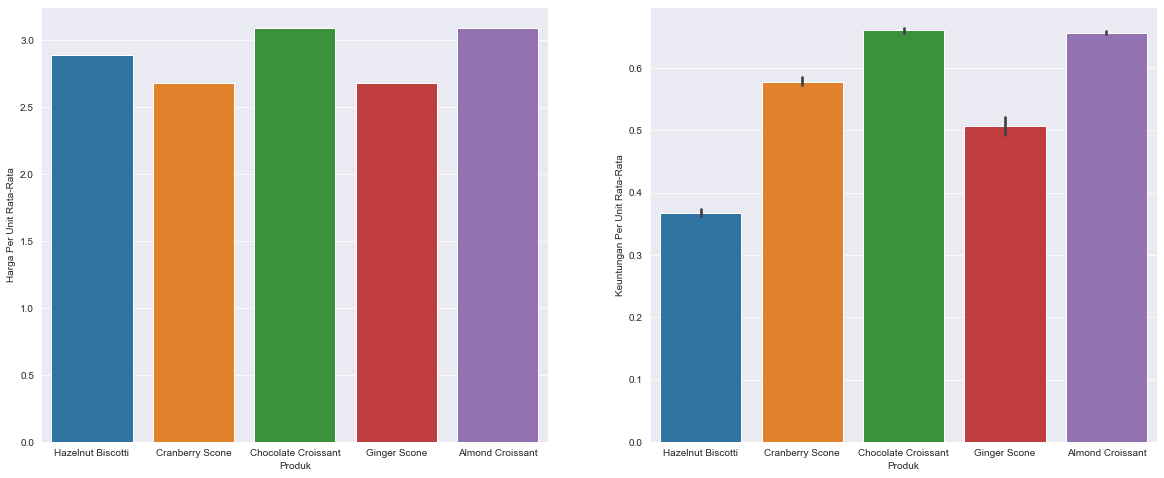

In [118]:
plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.barplot(x = 'product', y = 'current_average_price', data = pastry_invts).\
    set(xlabel = 'Produk', ylabel = 'Harga Per Unit Rata-Rata')

plt.subplot(1, 2, 2)
sns.barplot(x = 'product', y = 'unit_profit', data = receipts,
            order = ['Hazelnut Biscotti', 'Cranberry Scone',
                     'Chocolate Croissant', 'Ginger Scone', 'Almond Croissant']).\
    set(xlabel = 'Produk', ylabel = 'Keuntungan Per Unit Rata-Rata')

plt.show()

#### Berapa stok yang semestinya kita maintain untuk setiap jenis produk kita?

**Stok <u>Coffee</u> dan <u>Tea</u> dapat disimpan dalam jumlah banyak, karena banyak terjual dan berkontribusi pada keuntungan.**

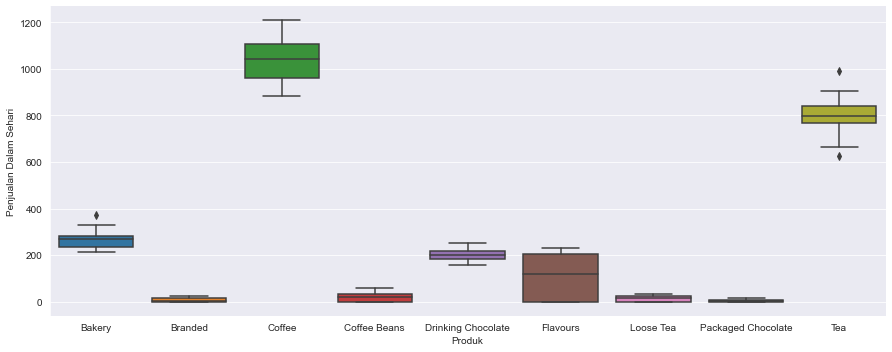

In [119]:
daily_invts = receipts.\
                groupby(['transaction_day', 'product_category'])['quantity'].\
                sum().reset_index()

sns.catplot(x = 'product_category', y = 'quantity', data = daily_invts,
            kind = 'box', estimator = np.sum, aspect = 2.5).\
    set(xlabel = 'Produk', ylabel = 'Penjualan Dalam Sehari')
plt.show()

Meskipun secara kuantitas kecil, tetapi **<u>Branded</u> menguntungkan dan _non-perishable_ sehingga dapat disimpan**, sementara **<u>Packaged Chocolate</u> dapat diminimalisasi karena penjualan rendah dan mahal.**

Coffee Beans sebenarnya menarik secara keuntungan sebelumnya, tetapi secara keuntungan per unit tidak semenarik Branded.

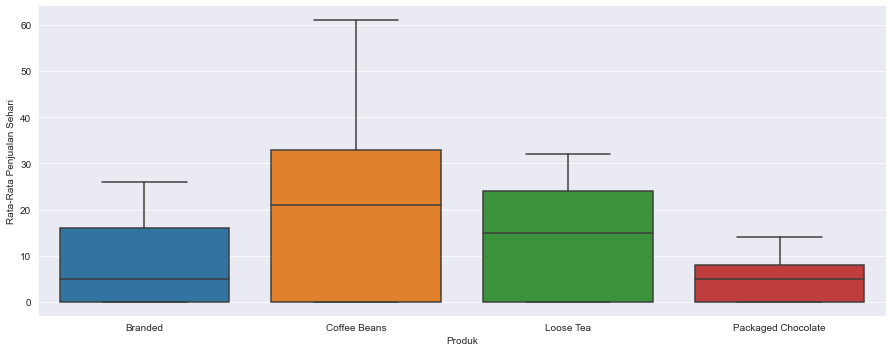

In [120]:
sns.catplot(x = 'product_category', y = 'quantity', 
            data = daily_invts, order = ['Branded', 'Coffee Beans', 
                                         'Loose Tea', 'Packaged Chocolate'],
            kind = 'box', estimator = np.sum, aspect = 2.5).\
    set(xlabel = 'Produk', ylabel = 'Rata-Rata Penjualan Sehari')
plt.show()

**Dua grafik di bawah ini penting untuk membandingkan _cost_ dan _benefit_ dari penyimpanan stok.**

Namun secara konklusi telah dibahas di kotak sebelumnya.

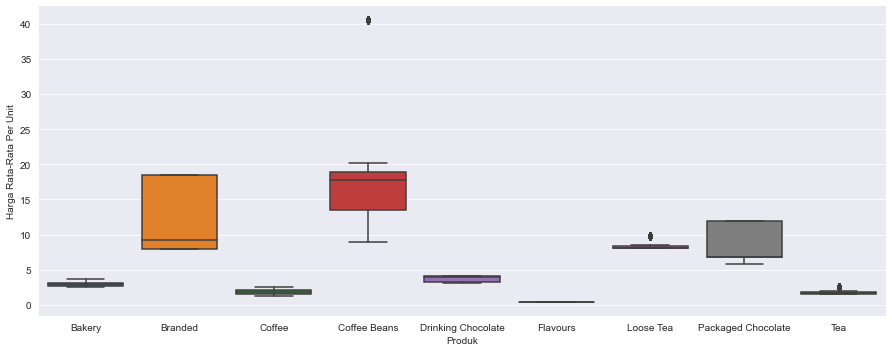

In [121]:
sns.catplot(x = 'product_category', y = 'current_average_price', data = receipts,
            kind = 'box', estimator = np.mean, aspect = 2.5).\
    set(xlabel = 'Produk', ylabel = 'Harga Rata-Rata Per Unit')
plt.show()

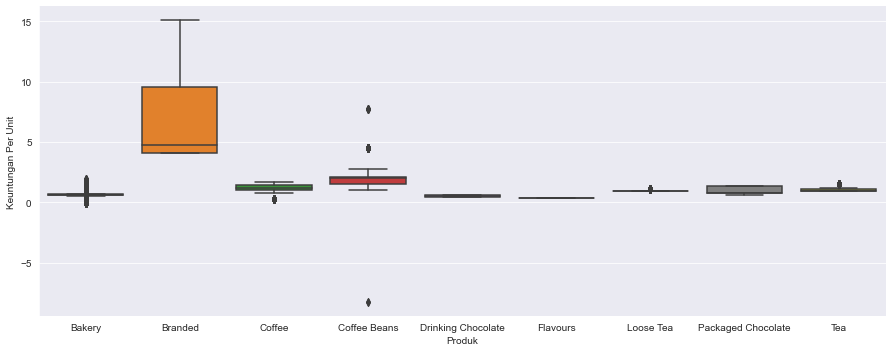

In [122]:
sns.catplot(x = 'product_category', y = 'unit_profit', data = receipts,
            kind = 'box', estimator = np.mean, aspect = 2.5).\
    set(xlabel = 'Produk', ylabel = 'Keuntungan Per Unit')
plt.show()

#### Berapakah inventory yang perlu dimaintain oleh setiap toko?

Dapat disesuaikan dari analisis _boxplot_ ini per kategori produk.

**Menariknya, outlet 3 seringkali memiliki variasi permintaan harian yang lebih besar, sehingga membutuhkan perhatian lebih.**

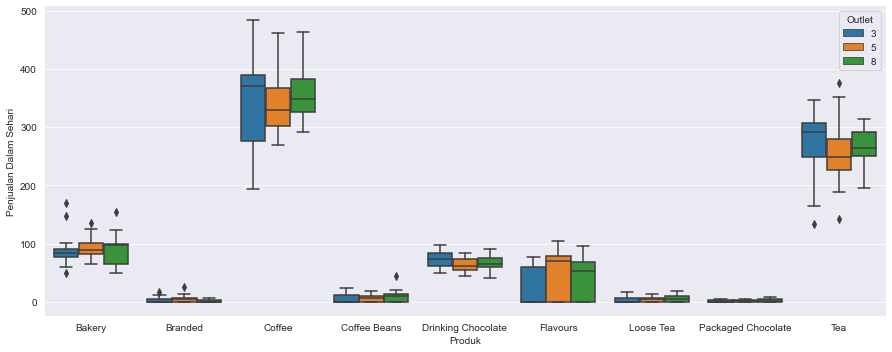

In [123]:
daily_invts_store = receipts.\
                    groupby(['sales_outlet_id', 
                             'transaction_day', 'product_category'])['quantity'].\
                    sum().reset_index()

sns.catplot(x = 'product_category', y = 'quantity', 
            data = daily_invts_store, 
            hue = 'sales_outlet_id', kind = 'box', 
            estimator = np.sum, legend = False, aspect = 2.5).\
    set(xlabel = 'Produk', ylabel = 'Penjualan Dalam Sehari')
plt.legend(title = 'Outlet')
plt.show()

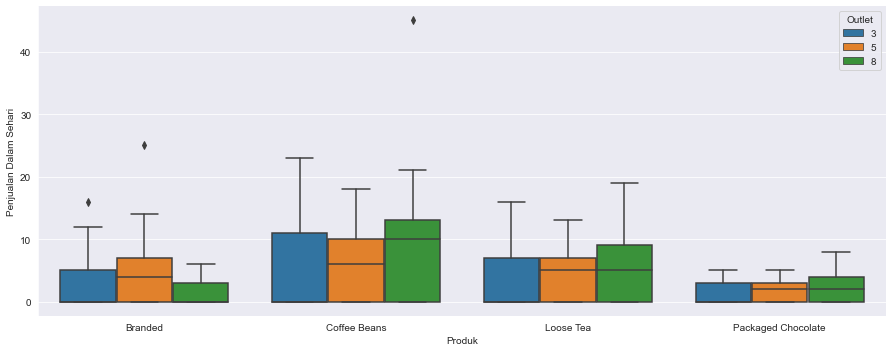

In [124]:
sns.catplot(x = 'product_category', y = 'quantity', 
            data = daily_invts_store, order = ['Branded', 'Coffee Beans', 
                                               'Loose Tea', 'Packaged Chocolate'],
            hue = 'sales_outlet_id', kind = 'box', 
            estimator = np.sum, legend = False, aspect = 2.5).\
    set(xlabel = 'Produk', ylabel = 'Penjualan Dalam Sehari')
plt.legend(title = 'Outlet')
plt.show()

#### Adakah variasi khusus dalam penjualan produk selama sebulan yang dapat berpengaruh terhadap pengaturan stok barang?

**Volume penjualan nampak meningkat hingga akhir bulan, lalu menurun dengan cepat!**

Berarti perlu memperhitungkan agar menyiapkan jumlah stok yang cukup untuk memenuhi permintaan akhir bulan, tetapi harus berhati-hati agar dapat dihabiskan.

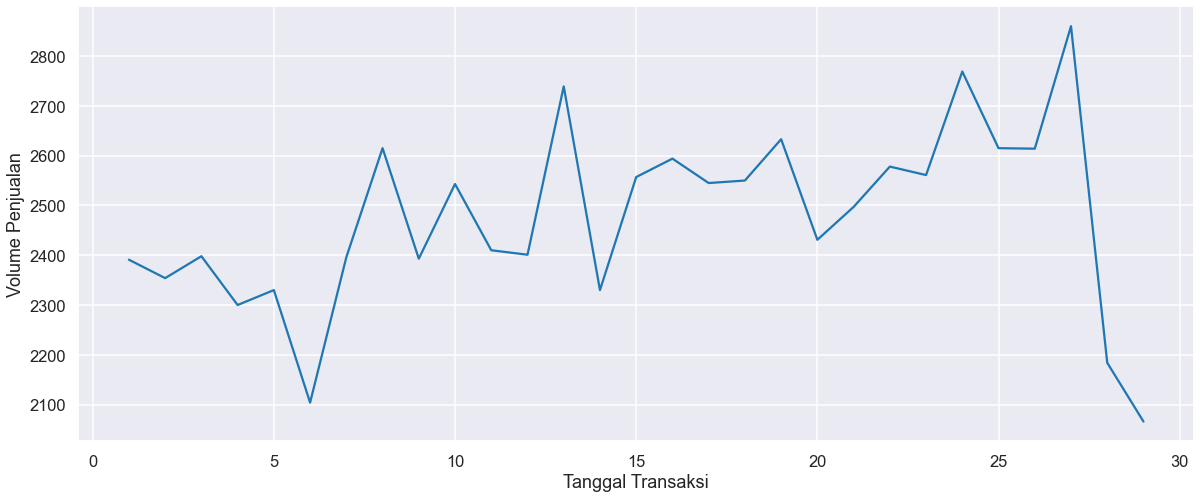

In [125]:
plt.figure(figsize = (20, 8))
sns.set_context('talk')

sns.lineplot(x = 'transaction_day', y = 'quantity', data = receipts, 
             estimator = np.sum, ci = None).\
    set(xlabel = 'Tanggal Transaksi', ylabel = 'Volume Penjualan')
plt.show()

**Setiap outlet memiliki pola yang berbeda-beda dalam penjualan setiap hari:**

- **Outlet 3**: Penjualan **lebih tinggi di awal dan akhir minggu.**  
- **Outlet 5**: Penjualan **tinggi di awal minggu** dan **jatuh di akhir minggu.**  
- **Outlet 8**: Penjualan **tinggi di hari Senin dan Sabtu**.

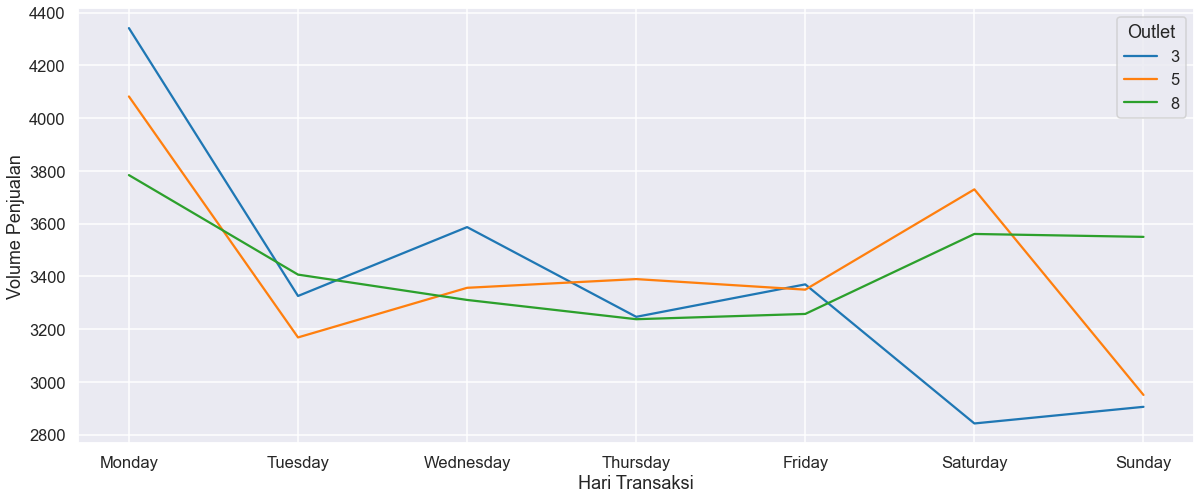

In [126]:
weekday_invts = receipts.groupby(['transaction_weekday', 
                                  'sales_outlet_id'])['quantity'].sum().reset_index()

plt.figure(figsize = (20, 8))

sns.lineplot(x = 'transaction_weekday', y = 'quantity', data = weekday_invts, 
             hue = 'sales_outlet_id', estimator = np.mean).\
    set(xlabel = 'Hari Transaksi', ylabel = 'Volume Penjualan')
plt.legend(title = 'Outlet')

plt.show()

## REKOMENDASI

**<u>Customer Profiling</u>**
1. **Optimisasi setiap outlet berdasarkan informasi segmentasi generasi**

- **Outlet 3** cenderung didatangi **generasi yang lebih tua**.
- **Outlet 5** memiliki lebih banyak **pelanggan generasi muda** (terutama didominasi older millenials).
- **Outlet 8** memiliki **persebaran generasi yang lebih merata**. 

- Dari informasi di atas, **desain dan konsep setiap store dapat disesuaikan** dengan _taste_ generasi masing-masing. Segmentasi pelanggan secara generasi berguna dan _in-line_ dengan pola penjualan selama ini, terutama sangat actionable di level kategori produk. 

**<u>Product Recommendation</u>**

2. **Atur strategi produk per outlet berdasarkan _taste_ per generasi dan hasil penjualan di outlet tersebut**

- Produk-produk dalam kategori **Coffee, Tea, Drinking Chocolate, serta Coffee Beans** akan lebih atraktif di **outlet 3**, kategori **Branded, Loose Tea, dan Bakery** dapat menjual di **outlet 5**, dan terakhir kategori **Bakery serta Packaged Chocolate** nampaknya relatif lebih populer di **outlet 8**. 
- **Inovasi produk maupun _bundling_** dapat dicoba untuk melakukan promosi akan produk-produk kategori tersebut.

3. **Berikan perhatian khusus pada dan belajar dari _top performing products_ dari segmen-segmen paling menguntungkan**

_General_
- **Lakukan apapun yang kita bisa untuk menjual lebih banyak ukuran Lg (Large) untuk minuman**, karena kontributor keuntungan terbesar nyaris selalu ukuran Lg. Hal-hal yang bisa dicoba: promo/produk yang hanya dijual untuk ukuran Lg (misalnya promo jika orang beli dengan botol minuman sendiri hanya khusus ukuran Lg), strategi _pricing_ sehingga Lg nampak sebagai yang paling _worth it_ secara value.

_Coffee_
- Untuk produk Coffee, selain meningkatkan _visibility_ atau promosi varian Jamaican Coffee River, Brazilian, dan Ethiopia, kita dapat **berinovasi untuk menambahkan kopi-kopi eksotis dari daerah-daerah kopi terkenal** yang mirip seperti itu karena nampaknya punya potensi terjual baik. Bisa dicoba _trial_ dulu, dan bisa diteruskan penjualannya jika penjualan baik maupun dipotong jika ternyata tidak terjual dengan baik.
- Margin terbaik per unit dari produk Coffee adalah Cappucino dan Latte, yang memiliki perbedaan sendiri sebagai varian-varian kopi kita yang jelas-jelas ada campuran susu dan tidak sekedar kopi. Mengingat penjualannya juga nampaknya masih cukup mendukung, kita bisa mencoba **inovasi produk Coffee lainnya yang juga ada campuran di dalamnya selain unsur kopi** untuk meningkatkan margin dan bisa jadi pendapatan kita secara umum. 

_Tea, Branded, Coffee Beans_
- Untuk produk-produk terbaik di kategori produk Tea, Branded, dan Coffee Beans, tentunya mereka bisa dipromosi lebih lanjut bebas dengan metode apapun, tetapi yang menarik adalah kontributor keuntungan terbesar selalu dari <u>barang dengan margin keuntungan terbesar pula</u>, entah _demand_ dari pelanggannya sendiri ada berapa secara kuantitas (terutama, lihat produk Tea). Oleh karena itu, **produk-produk selanjutnya bisa dicoba dan difokuskan untuk mencari yang marginnya besar** karena terbukti bahwa kontributor terbesar di beberapa segmen ini seringkali berasal dari margin, bukan (hanya) kuantitas yang superior.

**<u>Inventory Optimization</u>**

4. **Atur stok barang sesuai dengan performance serta _cost_ and _benefit_.**  

- **Siapkan Coffee dan Tea dalam jumlah lebih banyak** karena memiliki variasi penjualan tinggi sehingga perlu _safety stock_ yang lebih banyak, serta merupakan kontributor utama dari pendapatan/profit kita. 
- **Produk Branded dan kemudian Coffee Beans** juga bisa diandalkan karena keuntungan per unit tinggi dan relatif tahan lama. 
- Untuk outlet yang tidak punya preferensi khusus ke Packaged Chocolate, **stok bisa dioptimisasi/dikurangi untuk Packaged Chocolate** karena biaya stok yang cukup mahal (dari harganya), penjualan yang kurang banyak, dan keuntungan yang relatif kecil.
- Untuk _pastry waste_, **optimisasi dapat dilakukan berdasarkan _cost-benefit_ dari tipe _pastry_ tersebut selain pemotongan stok _pastry_ secara umum**. Hazelnut Biscotti dan Ginger Scone dapat dipotong signifikan karena keuntungan relatif lebih rendah, harga tidak terlalu murah, dan variasi _demand_ (resiko) tinggi, sementara pilihan terbaik adalah cranberry scone dengan harga rendah tetapi keuntungan tinggi.
- Agar _pastry_ tidak dibuang banyak setiap malam, bisa juga **dicoba promosi seperti _bundling_ dengan produk lain** untuk penjualan yang lebih banyak/mudah ditebak serta **diskon khusus _pastry_ di atas jam tertentu** agar cepat habis sebelum malam. 


5. **Sesuaikan stok dan penjualan setiap toko dengan transaksi harian/bulanan.**
- Secara umum diperlukan observasi dalam jangka lebih panjang untuk mengetahui pola sesungguhnya, tetapi **pola penjualan dalam seminggu serta peningkatan penjualan dari awal ke akhir bulan dapat menjadi pertimbangan** untuk _timing_ melakukan _stocking_ dan memastikan ada cukup _stock_ untuk pelanggan.
- **Setiap outlet memiliki pola penjualan berbeda yang bisa jadi pertimbangan _stocking_ hingga isu lain seperti _staffing decisions_**. Outlet 3 memiliki penjualan lebih tinggi di awal dan akhir minggu, outlet 5 memiliki penjualan tinggi di awal minggu dan jatuh di akhir minggu, dan outlet 8 memiliki penjualan tinggi di hari Senin dan Sabtu.

**<u>Topik Riset-Riset Selanjutnya</u>**

Apabila dataset dan _coffee shop_ ini dapat menerima analisis-analisis selanjutnya, maka berikut ini beberapa topik riset yang tidak dibahas di bawah _scope_ kali ini dan dapat sangat membantu secara bisnis:

1. **Deep dive ke dalam kasus _pastry waste_**  
Karena _scope_ analisis kali ini cukup luas dan umum, serta terdapat potensi untuk menentukan strategi yang lebih spesifik untuk kasus _pastry_ dengan analisis tambahan, maka pada analisis lain/selanjutnya dapat dilakukan analisis lebih lanjut terhadap pola pembelian _pastry_ serta strategi-strategi lain apa yang aman dan dapat dicoba untuk menurunkan _pastry waste_. Mengingat kategori Bakery adalah kontributor nomor tiga dari pendapatan kita, nampaknya pengecekan lebih lanjut perlu dilakukan untuk kasus _pastry_ ini.
  

2. **Pengecekan _taste_ pembelian di level pelanggan dan _cross-selling_**  
Apakah setiap pelanggan memiliki beberapa produk favorit yang mereka beli terus menerus? Produk-produk apa yang umumnya terjual bersama? Hal ini dapat sangat menentukan strategi penjualan yang bisa dicoba dan barang apa yang aman untuk dikurangi/dipotong dari penjualan. Pada akhirnya, ini semua dapat membantu meningkatkan pemahaman kita pada pelanggan dan penjualan pula.


3. **Analisis dengan data yang memiliki jangka waktu lebih panjang**  
Karena data ini hanya terdiri dari data satu bulan (April 2019), maka ada resiko bahwa ada pola-pola yang tidak _applicable_ di bulan-bulan lain, maupun ada pola-pola yang baru muncul di bulan-bulan lain yang tidak ada di sini. Secara spesifik, pola-pola penjualan mingguan dan selama satu bulan (dari tanggal muda ke tanggal tua) akan jauh lebih akurat apabila datanya lebih panjang jangka waktunya. Jika bisa ada akses untuk data >1 tahun, kualitas dan ketepatan analisis kita bisa jauh meningkat.

## SHORT VERSION
**Versi ini merupakan versi _walkthrough_ yang lebih pendek dan dilengkapi _storytelling_ yang lebih runut dan koheren dari EDA ini (awalnya dibuat untuk presentasi).**

Setiap outlet dalam dataset ini memiliki pelanggannya sendiri-sendiri, dimana setiap segmentasi memiliki _taste_ masing-masing. 

Mengetahui demand mereka, maka bergantung pada kita untuk mengoptimisasi pendapatan dan keuntungan berdasarkan permintaan serta manajemen _inventory_ yang baik.

Oleh karena itu, kita dapat menyesuaikan diri dan pengaturan produk kita untuk mencapai hasil terbaik, melalui rekomendasi yang telah diberikan.

Di bawah ini adalah _a short storytelling_ yang akan membawa Anda melalui cerita analisis ini. 

_(outline yang presentation-ready!)_

### Introduction

**Di dalam dataset terdapat 3 toko yang menjadi fokus utama, yaitu outlet 3, 5, 8.**

In [127]:
print('Daftar Store Dalam Data:\n')

print('Customers')
print(customers['home_store'].sort_values().unique().tolist())

print('Receipts')
print(receipts['sales_outlet_id'].sort_values().unique().tolist())

print('Pastry Inventory')
print(pastry_invts['sales_outlet_id'].sort_values().unique().tolist())

Daftar Store Dalam Data:

Customers
[3, 5, 8]
Receipts
['3', '5', '8']
Pastry Inventory
['3', '5', '8']


Ada beberapa goal yang ingin dicapai dari outlet-outlet ini, yaitu:
1. **Customer Profiling: Melakukan profiling terhadap pelanggan untuk _targeting_ dan distribusi produk**
2. **Product Recommendation: Memberikan rekomendasi produk untuk meningkatkan pendapatan**
3. **Inventory Optimization: Melakukan optimisasi terhadap stok kita agar tidak banyak terbuang percuma**

### Siapakah customer kita?

**Kita memiliki customer yang cenderung perempuan dan dari generasi yang lebih tua (<1990).**

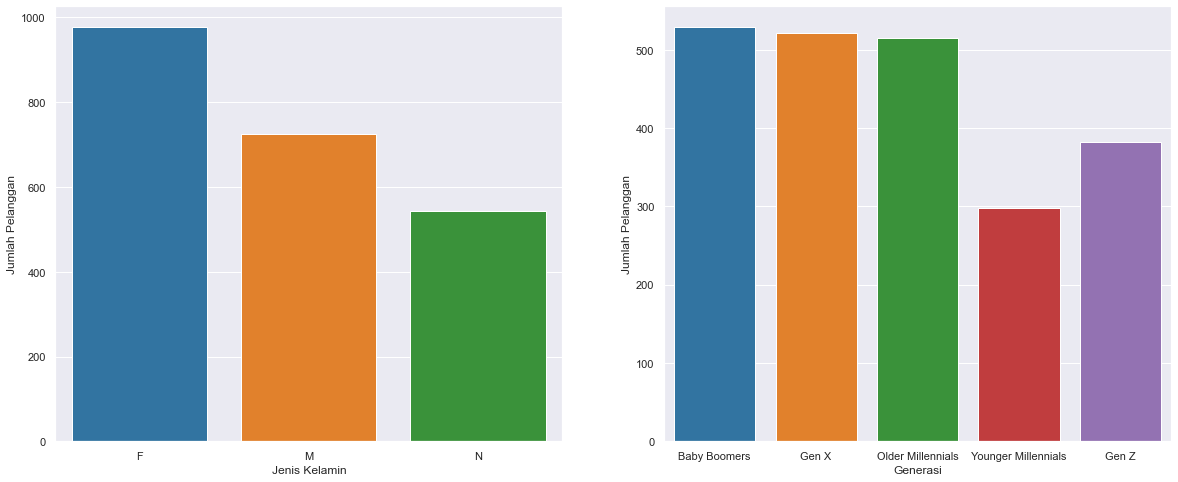

In [128]:
plt.figure(figsize = (20, 8))
sns.set_context('notebook')

plt.subplot(1, 2, 1)
sns.countplot(x = 'gender', data = customers).\
    set(xlabel = 'Jenis Kelamin', ylabel = 'Jumlah Pelanggan')

plt.subplot(1, 2, 2)
sns.countplot(x = 'generation', data = customers).\
    set(xlabel = 'Generasi', ylabel = 'Jumlah Pelanggan')

plt.show()

Apabila kita melihat lebih dalam, ternyata **pelanggan perempuan mendominasi untuk generasi yang lebih tua**, 

sementara **generasi yang lebih muda didominasi oleh pelanggan dengan jenis kelamin tidak diketahui**.

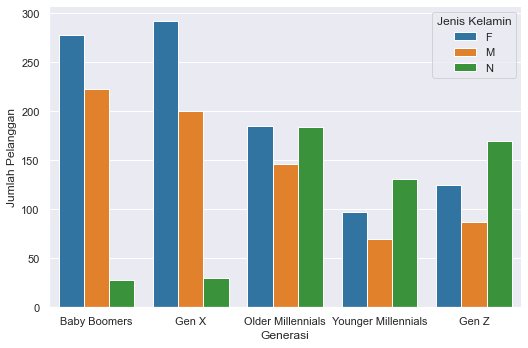

In [129]:
sns.catplot(x = 'generation', data = customers, hue = 'gender',
            kind = 'count', aspect = 1.5, legend = False).\
    set(xlabel = 'Generasi', ylabel = 'Jumlah Pelanggan')
plt.legend(title = 'Jenis Kelamin')
plt.show()

### Dimanakah pelangggan kita berada?

**Outlet 3 didominasi oleh pelanggan dari generasi lebih tua, outlet 5 didominasi oleh pelanggan Older Millennials, sementara outlet 8 cukup merata meskipun masih sedikit didominasi outlet 8.**

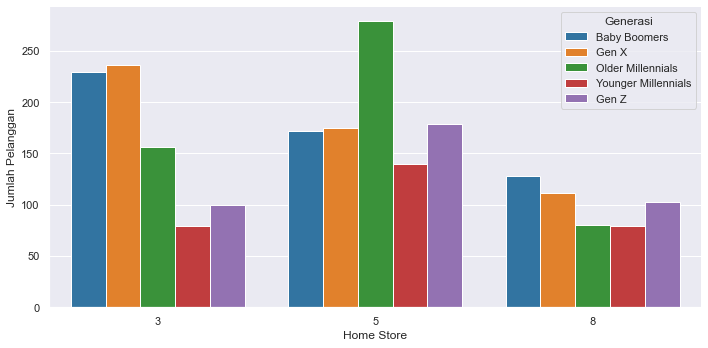

In [130]:
sns.catplot(x = 'home_store', data = customers, hue = 'generation',
            kind = 'count', legend = False, aspect = 2).\
    set(xlabel = 'Home Store', ylabel = 'Jumlah Pelanggan')
plt.legend(title = 'Generasi')
plt.show()

**Bagian ini akan cukup penting untuk mengetahui cara mengoptimisasi setiap store di bagian-bagian selanjutnya.**

### Mengapa mengetahui pelanggan kita siapa itu penting? 

**Karena taste pelanggan menentukan barang apa yang mereka beli.**

**Pelanggan tua sangat mendominasi di segmen Coffee, Tea, dan juga mendominasi di Bakery dan Coffee Beans (serta sedikit di Drinking Chocolate). Perhatikan pula Branded yang cukup didominasi kalangan Older Millennials.**

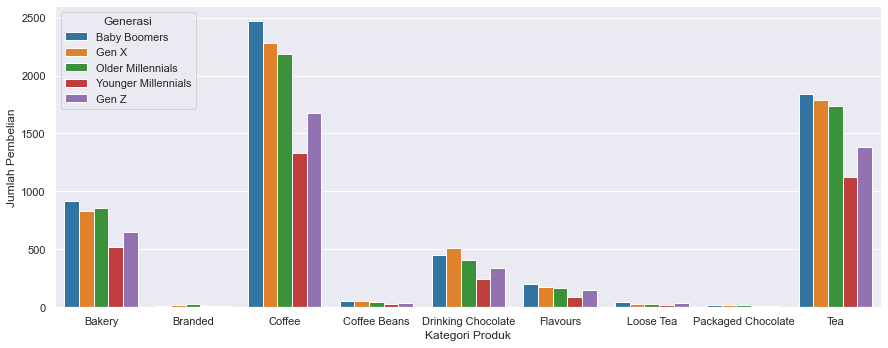

In [131]:
sns.catplot(x = 'product_category', data = receipts, hue = 'generation',
            kind = 'count', legend = False, aspect = 2.5).\
    set(xlabel = 'Kategori Produk', ylabel = 'Jumlah Pembelian')
plt.legend(title = 'Generasi')
plt.show()

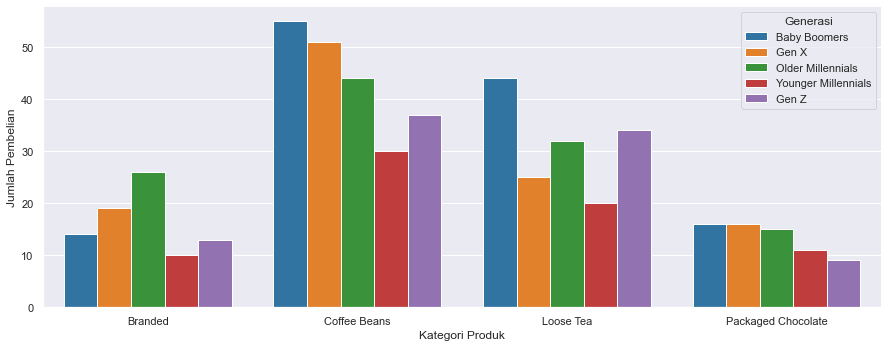

In [132]:
sns.catplot(x = 'product_category', data = receipts, hue = 'generation',
            kind = 'count', order = ['Branded', 'Coffee Beans',
                                    'Loose Tea', 'Packaged Chocolate'], 
            legend = False, aspect = 2.5).\
    set(xlabel = 'Kategori Produk', ylabel = 'Jumlah Pembelian')
plt.legend(title = 'Generasi')
plt.show()

### Mengapa mengetahui taste kategori mereka sangat penting?

**Karena ada segmen-segmen yang dapat mengkontribusikan keuntungan yang sangat besar.**

**Seperti yang dapat dilihat, Coffee dan Tea mendominasi pendapatan, diikuti Bakery dan Drinking Chocolate, semuanya kategori produk yang didominasi generasi tua.**

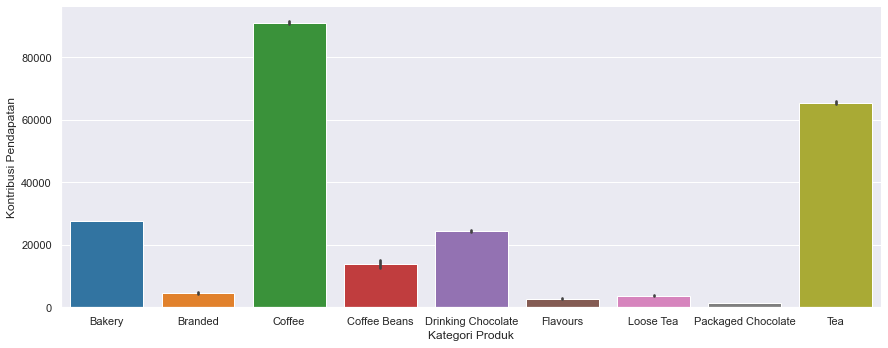

In [133]:
sns.catplot(x = 'product_category', y = 'order_revenue', data = receipts,
            kind = 'bar', estimator = np.sum, aspect = 2.5).\
    set(xlabel = 'Kategori Produk', ylabel = 'Kontribusi Pendapatan')
plt.show()

**Coffee dan Tea, segmen yang didominasi generasi yang lebih tua tadi, mengkontribusi pendapatan yang sangat besar secara total. Packaged Chocolate nyaris tidak berkontribusi.**

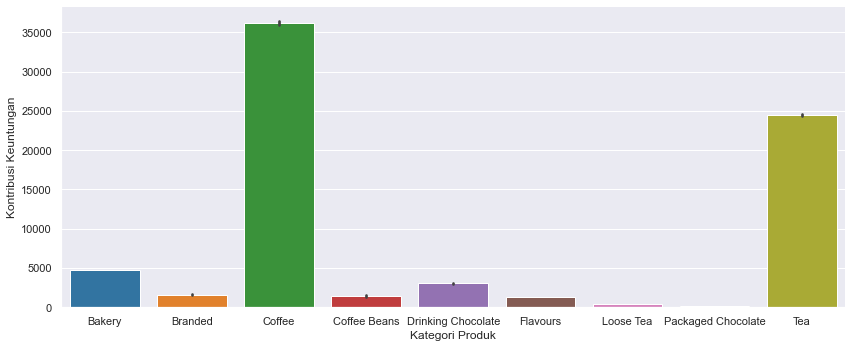

In [134]:
sns.catplot(x = 'product_category', y = 'order_profit', data = receipts,
            kind = 'bar', estimator = np.sum, aspect = 2.4).\
    set(xlabel = 'Kategori Produk', ylabel = 'Kontribusi Keuntungan')

plt.show()

**Menariknya jika kita lihat per unit, segmen Branded memberikan keuntungan yang sangat tinggi, yaitu segmen yang didominasi oleh Older Millennials. Jika kita mengingat yang sebelumnya, Older Millennials ada banyak di outlet 5! Coffee Beans juga didominasi oleh generasi yang lebih tua.**

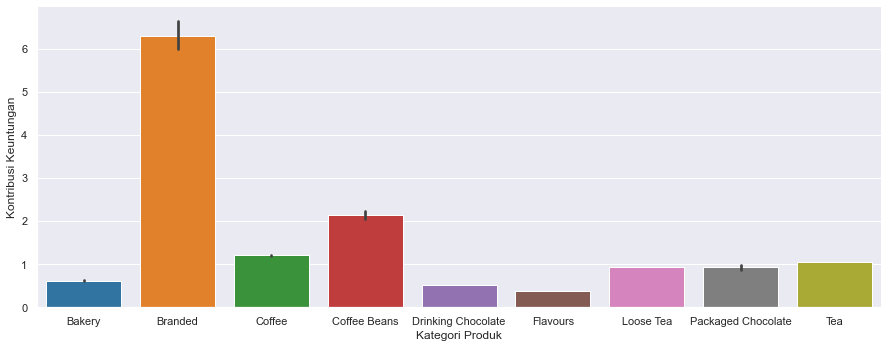

In [135]:
sns.catplot(x = 'product_category', y = 'unit_profit', data = receipts,
            kind = 'bar', estimator = np.mean, aspect = 2.5).\
    set(xlabel = 'Kategori Produk', ylabel = 'Kontribusi Keuntungan')
plt.show()

**Dalam notebook versi lengkap, _best performing products_ secara profit untuk Top 2 kontributor pendapatan (Coffee dan Tea) dan keuntungan (Branded dan Coffee Beans) juga dianalisis lengkap.**

### Inventory

**Hal pertama yang akan kita bahas adalah _pastry waste_ kita, dimana data yang ada menampilkan rata-rata nyaris 60%!**

Nampak jelas sekali bahwa masalah _waste_ ini adalah masalah yang cukup besar dan harus segera ditangani.

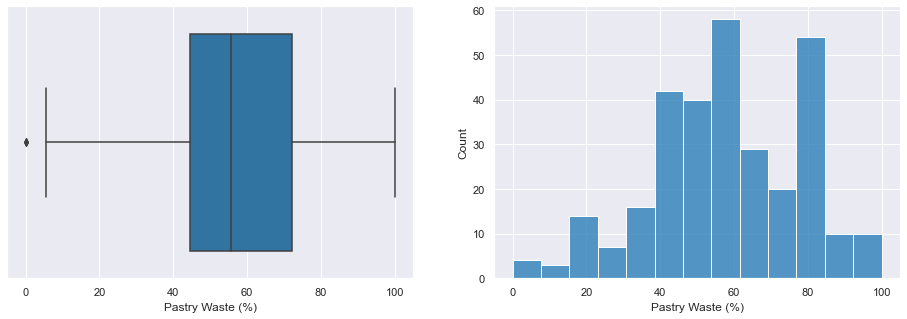

Rata-rata pastry waste kita adalah 57.85%!


In [136]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x = '% waste', data = pastry_invts).set(xlabel = 'Pastry Waste (%)')

plt.subplot(1, 2, 2)
sns.histplot(x = '% waste', data = pastry_invts).set(xlabel = 'Pastry Waste (%)')

plt.show()

print('Rata-rata pastry waste kita adalah ' +\
      str(round(pastry_invts['% waste'].mean(), 2)) + '%!')

**_Pastry waste_ dengan rata-rate tertinggi dikontribusikan oleh Ginger Scone, dengan tingkat rata-rata _pastry waste_ 70% (!!).**

_Semua produk lain yang ada di daftar ini juga memiliki rata-rata _waste_ di atas 50%._ 

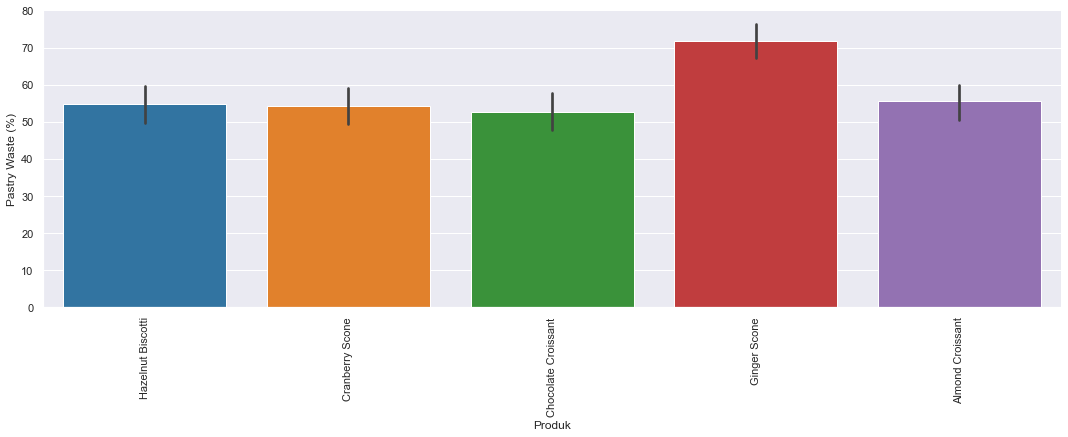

In [137]:
sns.catplot(x = 'product', y = '% waste', data = pastry_invts,
            kind = 'bar', estimator = np.mean, aspect = 3).\
    set(xlabel = 'Produk', ylabel = 'Pastry Waste (%)')
plt.xticks(rotation = 90)
plt.show()

**Idealnya kita ingin memotong jumlah produksi kita untuk menurunkan _waste_, tetapi tantangannya adalah variasi dalam penjualan setiap hari (terutama untuk Ginger Scone!).**

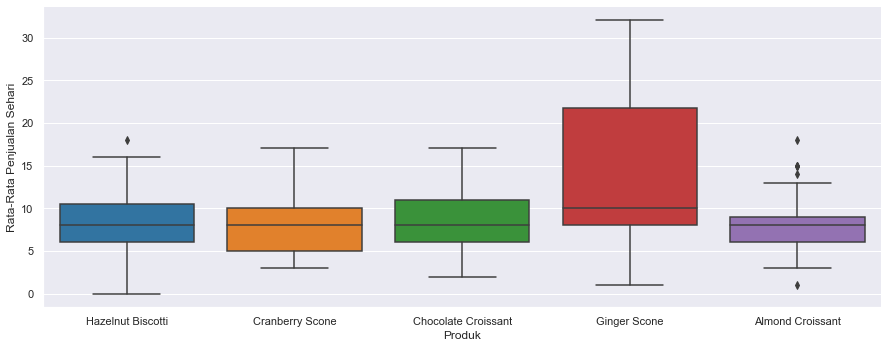

In [138]:
sns.catplot(x = 'product', y = 'quantity_sold', data = pastry_invts,
            kind = 'box', aspect = 2.5).\
    set(xlabel = 'Produk', ylabel = 'Rata-Rata Penjualan Sehari')
plt.show()

**Solusinya adalah kita harus mempertimbangkan _cost_ dari stok yang terlalu banyak dan _benefit_ dari mempertahankan stok, yaitu keuntungan setiap produk tersebut terjual.**

**Ada produk-produk dimana resiko kita mungkin bisa terbayar, seperti Chocolate Croissant dan Almond Croissant, sementara ada produk lain yang memang tidak terlalu menarik, seperti Hazelnut Biscotti**

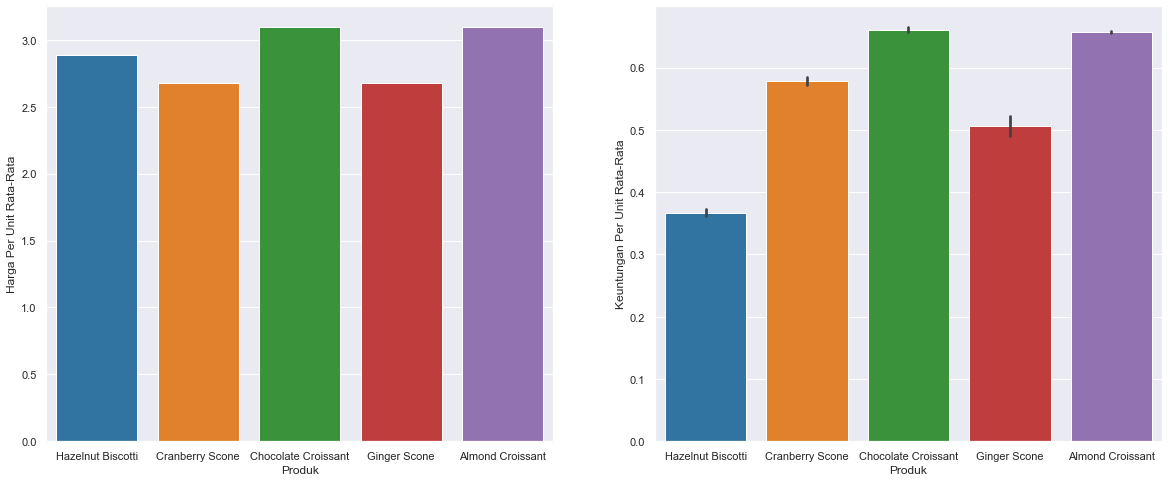

In [139]:
plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.barplot(x = 'product', y = 'current_average_price', data = pastry_invts).\
    set(xlabel = 'Produk', ylabel = 'Harga Per Unit Rata-Rata')

plt.subplot(1, 2, 2)
sns.barplot(x = 'product', y = 'unit_profit', data = receipts,
            order = ['Hazelnut Biscotti', 'Cranberry Scone',
                     'Chocolate Croissant', 'Ginger Scone', 'Almond Croissant']).\
    set(xlabel = 'Produk', ylabel = 'Keuntungan Per Unit Rata-Rata')

plt.show()

Mengenai produk-produk lain, **Coffee dan Tea adalah kandidat yang baik untuk stok barang, karena memberikan kontribusi keuntungan dan pendapatan yang tinggi serta disukai oleh pelanggan.**

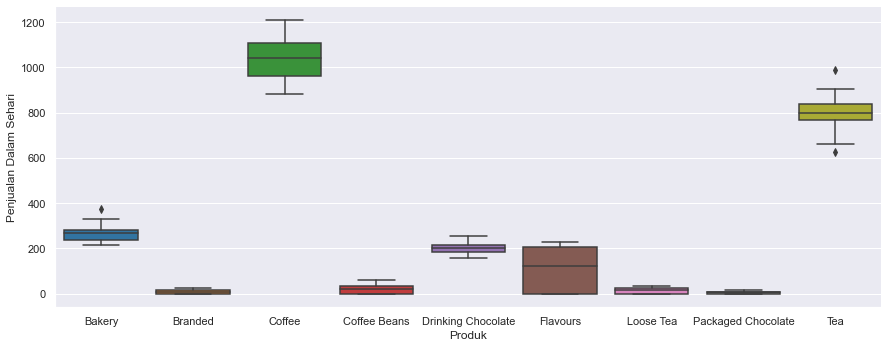

In [140]:
daily_invts = receipts.\
                groupby(['transaction_day', 'product_category'])['quantity'].\
                sum().reset_index()

sns.catplot(x = 'product_category', y = 'quantity', data = daily_invts,
            kind = 'box', estimator = np.sum, aspect = 2.5).\
    set(xlabel = 'Produk', ylabel = 'Penjualan Dalam Sehari')
plt.show()

**Meskipun secara kuantitas kecil, tetapi Branded menguntungkan dan _non-perishable_ sehingga dapat disimpan, sementara Packaged Chocolate dapat diminimalisasi karena penjualan rendah dan mahal.**

Coffee Beans sebenarnya juga bisa menarik sebagai opsi kedua selain Branded, tetapi Branded memang lebih unggul secara keuntungan per unit.

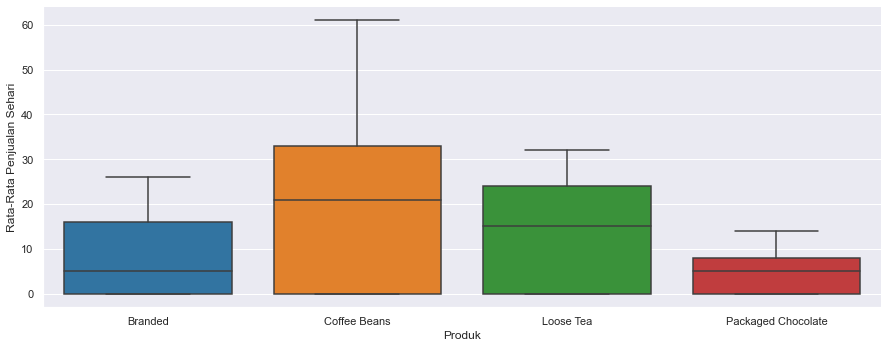

In [141]:
sns.catplot(x = 'product_category', y = 'quantity', 
            data = daily_invts, order = ['Branded', 'Coffee Beans', 
                                         'Loose Tea', 'Packaged Chocolate'],
            kind = 'box', estimator = np.sum, aspect = 2.5).\
    set(xlabel = 'Produk', ylabel = 'Rata-Rata Penjualan Sehari')
plt.show()

### Bonus: Analisis Secara Waktu

**Perlu berhati-hati karena volume penjualan nampak meningkat hingga akhir bulan, lalu menurun dengan cepat, sehingga stok jangan ditimbun di awal dan akhir bulan.**

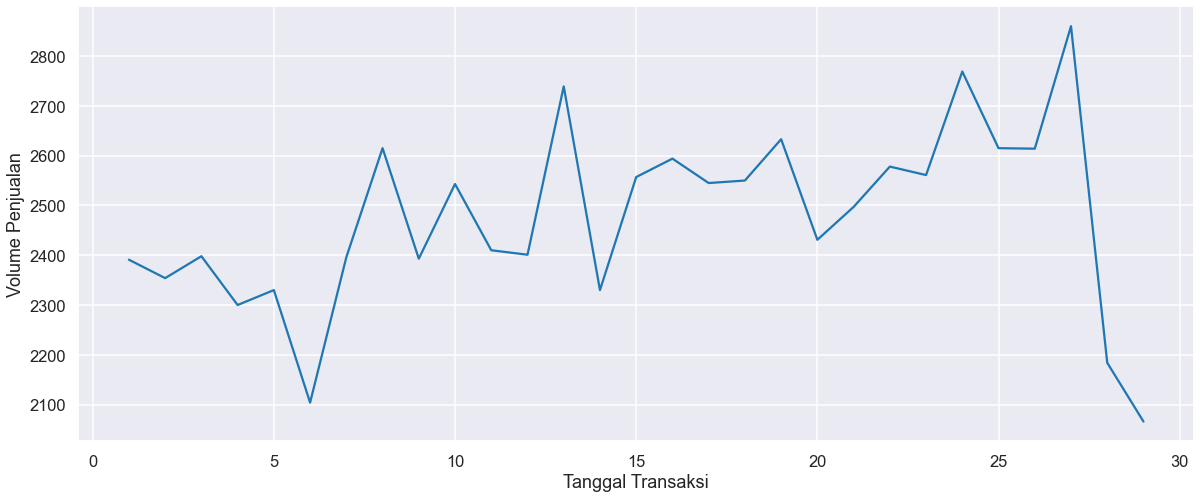

In [142]:
plt.figure(figsize = (20, 8))
sns.set_context('talk')

sns.lineplot(x = 'transaction_day', y = 'quantity', data = receipts, 
             estimator = np.sum, ci = None).\
    set(xlabel = 'Tanggal Transaksi', ylabel = 'Volume Penjualan')
plt.show()

**Pola penjualan harian tiap outlet juga menarik diperhatikan.**

**Outlet 3**: Penjualan **lebih tinggi di awal dan akhir minggu.**  
**Outlet 5**: Penjualan **tinggi di awal minggu** dan **jatuh di akhir minggu.**  
**Outlet 8**: Penjualan **tinggi di hari Senin dan Sabtu**.

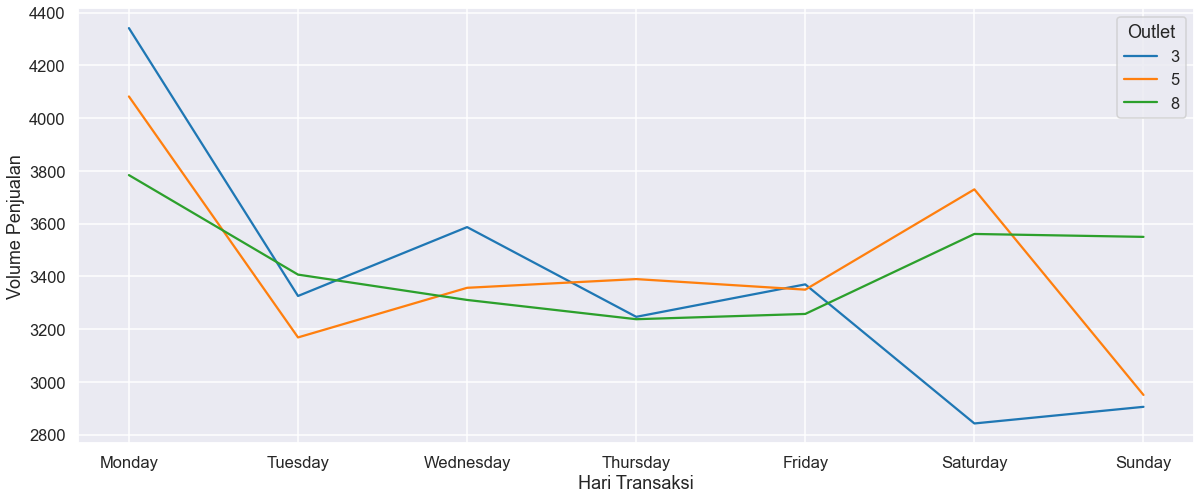

In [143]:
weekday_invts = receipts.groupby(['transaction_weekday', 
                                  'sales_outlet_id'])['quantity'].sum().reset_index()

plt.figure(figsize = (20, 8))

sns.lineplot(x = 'transaction_weekday', y = 'quantity', data = weekday_invts, 
             hue = 'sales_outlet_id', estimator = np.mean).\
    set(xlabel = 'Hari Transaksi', ylabel = 'Volume Penjualan')
plt.legend(title = 'Outlet')

plt.show()

### Rekomendasi

**Berikut ini rekomendasi yang diberikan per objektif besar dari analisis yang dilakukan!**

**<u>Customer Profiling</u>**
1. **Optimisasi setiap outlet berdasarkan informasi segmentasi generasi**

- **Outlet 3** cenderung didatangi **generasi yang lebih tua**.
- **Outlet 5** memiliki lebih banyak **pelanggan generasi muda** (terutama didominasi older millenials).
- **Outlet 8** memiliki **persebaran generasi yang lebih merata**. 

- Dari informasi di atas, **desain dan konsep setiap store dapat disesuaikan** dengan _taste_ generasi masing-masing. Segmentasi pelanggan secara generasi berguna dan _in-line_ dengan pola penjualan selama ini, terutama sangat actionable di level kategori produk. 

**<u>Product Recommendation</u>**

2. **Atur strategi produk per outlet berdasarkan _taste_ per generasi dan hasil penjualan di outlet tersebut**

- Produk-produk dalam kategori **Coffee, Tea, Drinking Chocolate, serta Coffee Beans** akan lebih atraktif di **outlet 3**, kategori **Branded, Loose Tea, dan Bakery** dapat menjual di **outlet 5**, dan terakhir kategori **Bakery serta Packaged Chocolate** nampaknya relatif lebih populer di **outlet 8**. 
- **Inovasi produk maupun _bundling_** dapat dicoba untuk melakukan promosi akan produk-produk kategori tersebut.

3. **Berikan perhatian khusus pada dan belajar dari _top performing products_ dari segmen-segmen paling menguntungkan**

_General_
- **Lakukan apapun yang kita bisa untuk menjual lebih banyak ukuran Lg (Large) untuk minuman**, karena kontributor keuntungan terbesar nyaris selalu ukuran Lg. Hal-hal yang bisa dicoba: promo/produk yang hanya dijual untuk ukuran Lg (misalnya promo jika orang beli dengan botol minuman sendiri hanya khusus ukuran Lg), strategi _pricing_ sehingga Lg nampak sebagai yang paling _worth it_ secara value.

_Coffee_
- Untuk produk Coffee, selain meningkatkan _visibility_ atau promosi varian Jamaican Coffee River, Brazilian, dan Ethiopia, kita dapat **berinovasi untuk menambahkan kopi-kopi eksotis dari daerah-daerah kopi terkenal** yang mirip seperti itu karena nampaknya punya potensi terjual baik. Bisa dicoba _trial_ dulu, dan bisa diteruskan penjualannya jika penjualan baik maupun dipotong jika ternyata tidak terjual dengan baik.
- Margin terbaik per unit dari produk Coffee adalah Cappucino dan Latte, yang memiliki perbedaan sendiri sebagai varian-varian kopi kita yang jelas-jelas ada campuran susu dan tidak sekedar kopi. Mengingat penjualannya juga nampaknya masih cukup mendukung, kita bisa mencoba **inovasi produk Coffee lainnya yang juga ada campuran di dalamnya selain unsur kopi** untuk meningkatkan margin dan bisa jadi pendapatan kita secara umum. 

_Tea, Branded, Coffee Beans_
- Untuk produk-produk terbaik di kategori produk Tea, Branded, dan Coffee Beans, tentunya mereka bisa dipromosi lebih lanjut bebas dengan metode apapun, tetapi yang menarik adalah kontributor keuntungan terbesar selalu dari <u>barang dengan margin keuntungan terbesar pula</u>, entah _demand_ dari pelanggannya sendiri ada berapa secara kuantitas (terutama, lihat produk Tea). Oleh karena itu, **produk-produk selanjutnya bisa dicoba dan difokuskan untuk mencari yang marginnya besar** karena terbukti bahwa kontributor terbesar di beberapa segmen ini seringkali berasal dari margin, bukan (hanya) kuantitas yang superior.

**<u>Inventory Optimization</u>**

4. **Atur stok barang sesuai dengan performance serta _cost_ and _benefit_.**  

- **Siapkan Coffee dan Tea dalam jumlah lebih banyak** karena memiliki variasi penjualan tinggi sehingga perlu _safety stock_ yang lebih banyak, serta merupakan kontributor utama dari pendapatan/profit kita. 
- **Produk Branded dan kemudian Coffee Beans** juga bisa diandalkan karena keuntungan per unit tinggi dan relatif tahan lama. 
- Untuk outlet yang tidak punya preferensi khusus ke Packaged Chocolate, **stok bisa dioptimisasi/dikurangi untuk Packaged Chocolate** karena biaya stok yang cukup mahal (dari harganya), penjualan yang kurang banyak, dan keuntungan yang relatif kecil.
- Untuk _pastry waste_, **optimisasi dapat dilakukan berdasarkan _cost-benefit_ dari tipe _pastry_ tersebut selain pemotongan stok _pastry_ secara umum**. Hazelnut Biscotti dan Ginger Scone dapat dipotong signifikan karena keuntungan relatif lebih rendah, harga tidak terlalu murah, dan variasi _demand_ (resiko) tinggi, sementara pilihan terbaik adalah cranberry scone dengan harga rendah tetapi keuntungan tinggi.
- Agar _pastry_ tidak dibuang banyak setiap malam, bisa juga **dicoba promosi seperti _bundling_ dengan produk lain** untuk penjualan yang lebih banyak/mudah ditebak serta **diskon khusus _pastry_ di atas jam tertentu** agar cepat habis sebelum malam. 


5. **Sesuaikan stok dan penjualan setiap toko dengan transaksi harian/bulanan.**
- Secara umum diperlukan observasi dalam jangka lebih panjang untuk mengetahui pola sesungguhnya, tetapi **pola penjualan dalam seminggu serta peningkatan penjualan dari awal ke akhir bulan dapat menjadi pertimbangan** untuk _timing_ melakukan _stocking_ dan memastikan ada cukup _stock_ untuk pelanggan.
- **Setiap outlet memiliki pola penjualan berbeda yang bisa jadi pertimbangan _stocking_ hingga isu lain seperti _staffing decisions_**. Outlet 3 memiliki penjualan lebih tinggi di awal dan akhir minggu, outlet 5 memiliki penjualan tinggi di awal minggu dan jatuh di akhir minggu, dan outlet 8 memiliki penjualan tinggi di hari Senin dan Sabtu.

**<u>Topik Riset-Riset Selanjutnya</u>**

Apabila dataset dan _coffee shop_ ini dapat menerima analisis-analisis selanjutnya, maka berikut ini beberapa topik riset yang tidak dibahas di bawah _scope_ kali ini dan dapat sangat membantu secara bisnis:

1. **Deep dive ke dalam kasus _pastry waste_**  
Karena _scope_ analisis kali ini cukup luas dan umum, serta terdapat potensi untuk menentukan strategi yang lebih spesifik untuk kasus _pastry_ dengan analisis tambahan, maka pada analisis lain/selanjutnya dapat dilakukan analisis lebih lanjut terhadap pola pembelian _pastry_ serta strategi-strategi lain apa yang aman dan dapat dicoba untuk menurunkan _pastry waste_. Mengingat kategori Bakery adalah kontributor nomor tiga dari pendapatan kita, nampaknya pengecekan lebih lanjut perlu dilakukan untuk kasus _pastry_ ini.
  

2. **Pengecekan _taste_ pembelian di level pelanggan dan _cross-selling_**  
Apakah setiap pelanggan memiliki beberapa produk favorit yang mereka beli terus menerus? Produk-produk apa yang umumnya terjual bersama? Hal ini dapat sangat menentukan strategi penjualan yang bisa dicoba dan barang apa yang aman untuk dikurangi/dipotong dari penjualan. Pada akhirnya, ini semua dapat membantu meningkatkan pemahaman kita pada pelanggan dan penjualan pula.


3. **Analisis dengan data yang memiliki jangka waktu lebih panjang**  
Karena data ini hanya terdiri dari data satu bulan (April 2019), maka ada resiko bahwa ada pola-pola yang tidak _applicable_ di bulan-bulan lain, maupun ada pola-pola yang baru muncul di bulan-bulan lain yang tidak ada di sini. Secara spesifik, pola-pola penjualan mingguan dan selama satu bulan (dari tanggal muda ke tanggal tua) akan jauh lebih akurat apabila datanya lebih panjang jangka waktunya. Jika bisa ada akses untuk data >1 tahun, kualitas dan ketepatan analisis kita bisa jauh meningkat.

## ACKNOWLEDGMENTS

Eksplorasi data ini dibuat untuk proyek _capstone_ kelas _Basic Analytics for Business People_ Narasio Data, lalu diedit serta diupdate sebelum dibuat dalam versi ini. 

Terima kasih untuk Mbak Dyantika sebagai mentorku selama kelas dan tim trainer Narasio Data untuk kelasnya yang menarik, dan teman saya Nicholas C.W. sebagai teman diskusi dan inspirasi untuk bagian rekomendasi bisnisnya!

© 2022 [Felicia S.](https://github.com/feliciasanm) - All rights reserved unless otherwise stated!